<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Optimization-of-industrial-costs" data-toc-modified-id="Optimization-of-industrial-costs-1">Optimization of industrial costs</a></span><ul class="toc-item"><li><span><a href="#1.-General-information-about-data-" data-toc-modified-id="1.-General-information-about-data--1.1">1. General information about data <a id="start" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#data_arc" data-toc-modified-id="data_arc-1.1.1">data_arc</a></span></li><li><span><a href="#data_bulk" data-toc-modified-id="data_bulk-1.1.2">data_bulk</a></span></li><li><span><a href="#data_bulk_time" data-toc-modified-id="data_bulk_time-1.1.3">data_bulk_time</a></span></li><li><span><a href="#data_gas" data-toc-modified-id="data_gas-1.1.4">data_gas</a></span></li><li><span><a href="#data_temp" data-toc-modified-id="data_temp-1.1.5">data_temp</a></span></li><li><span><a href="#data_wire" data-toc-modified-id="data_wire-1.1.6">data_wire</a></span></li><li><span><a href="#data_wire_time" data-toc-modified-id="data_wire_time-1.1.7">data_wire_time</a></span></li></ul></li><li><span><a href="#2.-Summary-Table" data-toc-modified-id="2.-Summary-Table-1.2">2. Summary Table</a></span></li><li><span><a href="#3.-Training-models" data-toc-modified-id="3.-Training-models-1.3">3. Training models</a></span><ul class="toc-item"><li><span><a href="#3.1-LinearRegression" data-toc-modified-id="3.1-LinearRegression-1.3.1">3.1 LinearRegression</a></span></li><li><span><a href="#3.2-LGBMRegressor" data-toc-modified-id="3.2-LGBMRegressor-1.3.2">3.2 LGBMRegressor</a></span></li><li><span><a href="#3.3-CatBoostRegressor" data-toc-modified-id="3.3-CatBoostRegressor-1.3.3">3.3 CatBoostRegressor</a></span></li></ul></li><li><span><a href="#4.-Analysis-of-models" data-toc-modified-id="4.-Analysis-of-models-1.4">4. Analysis of models</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.5">Conclusion</a></span></li></ul></li><li><span><a href="#Report" data-toc-modified-id="Report-2">Report</a></span></li></ul></div>

# Optimization of industrial costs

In order to optimize production costs, the smelter wants to reduce energy consumption during the steel processing stage.
Objective:
Build a model that predicts the temperature of the steel.

## 1. General information about data <a id="start"></a>

Open the data files and examine the general information.

Consider what features will be included in the final table for further research.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats as st

import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats as st

from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
pd.options.mode.chained_assignment = None

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

import warnings
warnings.simplefilter("ignore")


# files with data:
data_arc = pd.read_csv('C:/datasets/final_steel/data_arc.csv', sep=',')
data_bulk = pd.read_csv("C:/datasets/final_steel/data_bulk.csv", sep=",")
data_bulk_time = pd.read_csv("C:/datasets/final_steel/data_bulk_time.csv", sep=",")
data_gas = pd.read_csv("C:/datasets/final_steel/data_gas.csv", sep=",")
data_temp = pd.read_csv("C:/datasets/final_steel/data_temp.csv", sep=",")
data_wire = pd.read_csv("C:/datasets/final_steel/data_wire.csv", sep=",")
data_wire_time = pd.read_csv("C:/datasets/final_steel/data_wire_time.csv", sep=",")


data = [data_arc, data_bulk, data_bulk_time, data_gas, data_temp, data_wire, data_wire_time]
data_names = ['data_arc', 'data_bulk', 'data_bulk_time', 'data_gas', 'data_temp', 'data_wire', 'data_wire_time']

In [2]:
for i in data:
    i.info()
    display(i.head(15))
    print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaN,NaN,NaN,2019-05-03 13:59:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:53:27,NaN,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaN,NaN,NaN,2019-05-03 14:29:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:22:19,NaN,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaN,NaN,NaN,2019-05-03 15:04:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:55:46,NaN,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaN,NaN,NaN,2019-05-03 15:47:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:41:00,NaN,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:18:52,NaN,2019-05-03 16:18:52,2019-05-03 16:18:52



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:59:02,2019-05-03 13:59:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:28:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:42:43,2019-05-03 15:58:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:20:25,2019-05-03 16:21:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data consists of files obtained from various sources:

- `data_arc.csv` — electrode data;
- `data_bulk.csv` — data on the supply of bulk materials (volume);
- `data_bulk_time.csv` — bulk material feeding data (time);
- `data_gas.csv` — gas purge data;
- `data_temp.csv` — temperature measurement results;
- `data_wire.csv` — wire material data (volume);
- `data_wire_time.csv` — wire material data (time).

Consider each table separately.

### data_arc

Таблица будет содержать столбцы: "Суммарное время нагрева",  "Средняя мощность", "Количество запусков"

There are no missing values in this table.

     1. Create a column with the total heating time "Heating time" in seconds

     2. Calculate the "Full power"

     3. Group by 'key'.

In [3]:
# Heating time
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'])
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'])

data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'])
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'])
  
data_arc['Heating time'] = (data_arc['Конец нагрева дугой']-data_arc['Начало нагрева дугой']).astype('timedelta64[s]')

In [4]:
# полная мощность
data_arc['Full power'] = (data_arc['Активная мощность']**2 + data_arc['Реактивная мощность']**2)**0.5

In [5]:
display(data_arc.head(10))

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Heating time,Full power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228.0,1.193639
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185.0,0.959010
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172.0,0.896038
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365.0,1.970470
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148.0,0.807239
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043,137.0,0.521549
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914,338.0,1.574162
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281,126.0,0.577638
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874,210.0,0.975867
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494,280.0,1.256527


Consider the correlation of features in the table

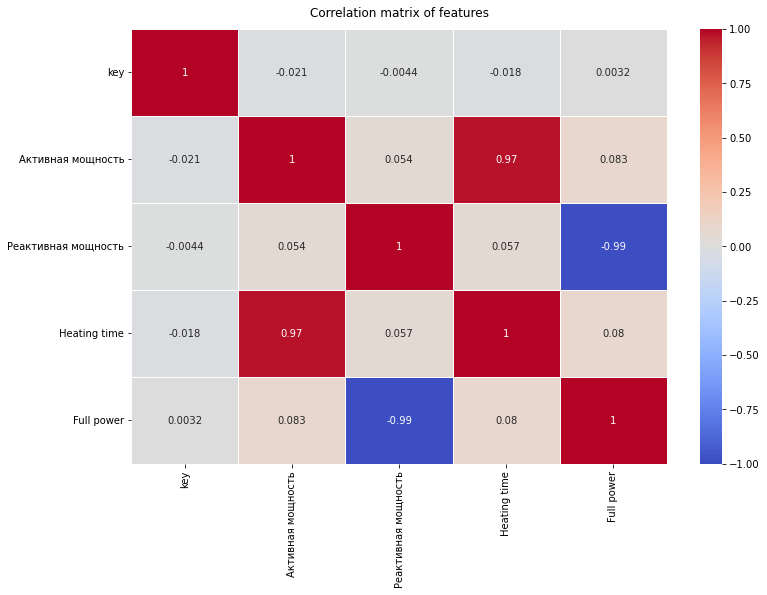

In [6]:
# Correlation matrix
corr = data_arc.corr()
plt.figure(figsize = (12,8))
heatmap = sns.heatmap(corr, cmap="coolwarm", linewidths=1, linecolor='white', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation matrix of features', fontdict = {'fontsize': 12}, pad = 12)
plt.show()

The heating time strongly correlates with an active power, so the heating time will not be used in the research.

In [7]:
# group on Key
data_arc_grouped = data_arc.groupby('key').agg({'Heating time': ['count'], 'Full power': ['mean'], 'Активная мощность': ['sum']})
data_arc_grouped.columns = data_arc_grouped.columns.droplevel(0)
data_arc_grouped.reset_index(level=['key'], inplace=True)
data_arc_grouped.columns = ['key', 'number of operations', 'mean full power', 'total act. power']

In [8]:
display(data_arc_grouped.head(3))

,key,number of operations,mean full power,total act. power
0,1,5,1.165279,4.878147
1,2,4,0.912304,3.052598
2,3,5,0.597907,2.525882


Check on the correlation grouped features

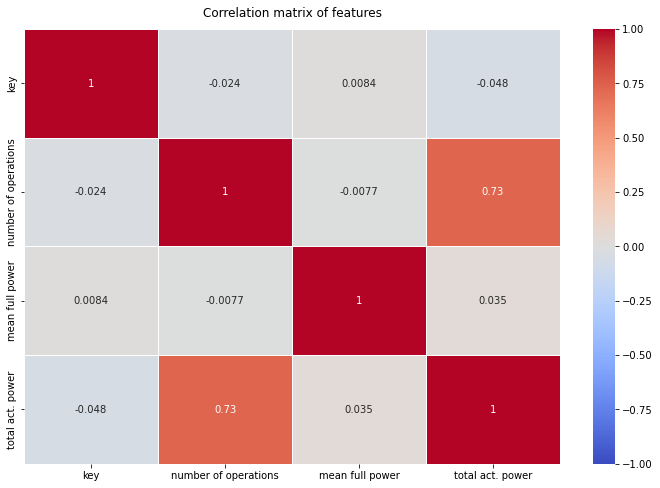

In [9]:
# Construction of the correlation matrix
corr = data_arc_grouped.corr()
plt.figure(figsize = (12,8))
heatmap = sns.heatmap(corr, cmap="coolwarm", linewidths=1, linecolor='white', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation matrix of features', fontdict = {'fontsize': 12}, pad = 12)
plt.show()

There are no correlating features.

Consider the distribution of the features separately.

In [10]:
def boxplot(data, column, k='blue', x1=None, x2=None):
    sns.set(rc={'figure.figsize':(20, 2)})
    sns.boxplot(x = column, data=data, orient='h', color=k)
    plt.xlim(x1, x2)
    plt.title("Boxplots of "+column)
    plt.show()

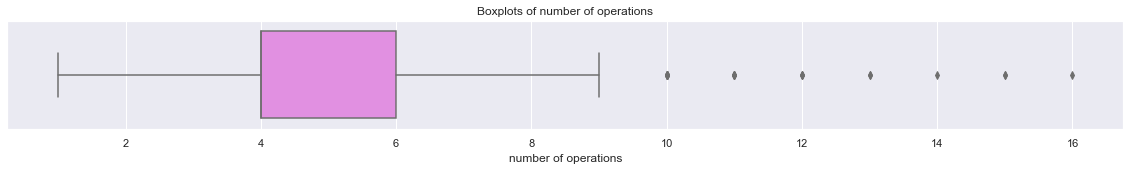

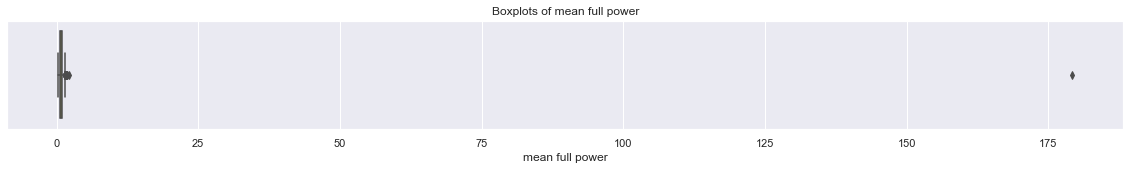

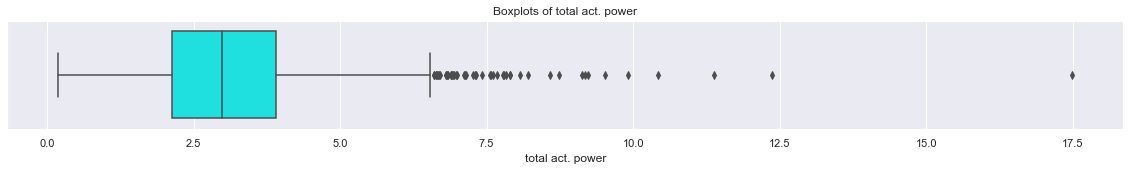

In [11]:
colorlist = ['violet', 'yellow', 'aqua']
a = 0
for i in ['number of operations', 'mean full power', 'total act. power']:
    k = colorlist[a]
    boxplot(data_arc_grouped, i, k)
    a +=1

In [12]:
display(data_arc_grouped.describe())

,key,number of operations,mean full power,total act. power
count,3214.000000,3214.000000,3214.000000,3214.000000
mean,1623.061294,4.628500,0.895216,3.103138
std,934.739859,1.608647,3.157901,1.397390
min,1.000000,1.000000,0.228541,0.186226
25%,817.250000,4.000000,0.651909,2.126339
50%,1623.500000,4.000000,0.816520,2.990537
75%,2431.750000,6.000000,0.996846,3.901147
max,3241.000000,16.000000,179.284396,17.496497


On the charts, we see anomalous parties: parties, a mean full power of which overcomes 175, parties, a mean act. power of which exceeds 1.8. The appearance of such values is probably due to the conditions that went beyond normal.

As a result, we see that in most cases heating in one batch is carried out for 4-5 cycles, while the mean total power is 0.8-0.9, and the mean act. power is 0.64-0.67

**The common table will include features:**

**-number of operations**

**-mean full power**

**-total act. power**

### data_bulk

This table has missed values, replace them with 0, assuming that the additive was not used.

1. We construct scope diagrams (Boxplots) with info about volumes of used additives.
2. Calculate the number of cases of using the additive.

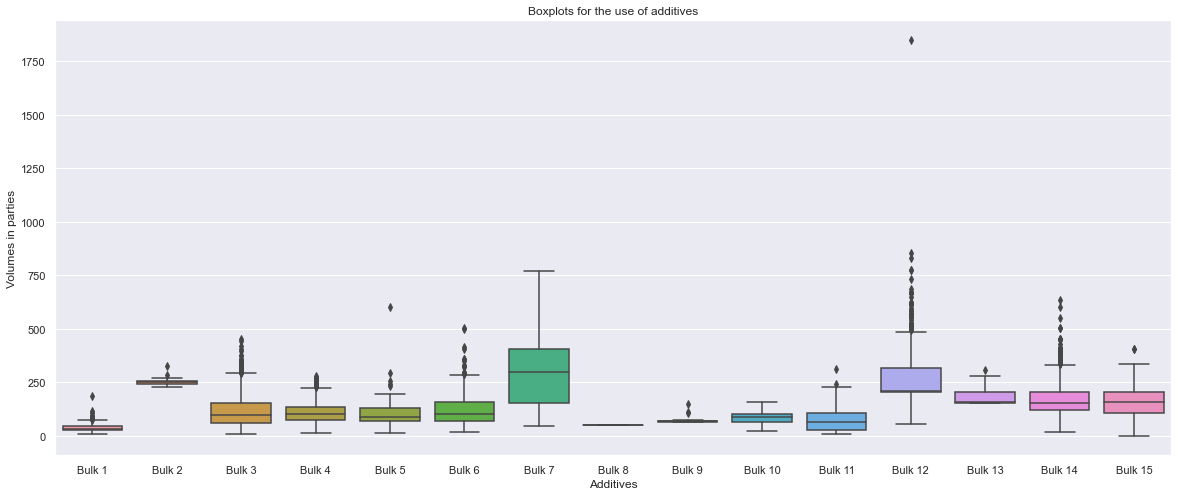

In [13]:
data_bulk_only = data_bulk.drop('key', 1)
sns.set(rc={'figure.figsize':(20, 8)})
sns.boxplot(x="variable", y="value", data=pd.melt(data_bulk_only))
plt.title("Boxplots for the use of additives")
plt.ylabel("Volumes in parties")
plt.xlabel("Additives")

plt.show()

On the boxplot of use of additives on the Bulk 12 scope diagram, we see an abnormally high value. Perhaps this is due to some technological error or experiment.

The chart of the 'Bulk 8' looks suspicious. Consider the values in them.

In [14]:
data_bulk['Bulk 8'].value_counts()

49.0    1
Name: Bulk 8, dtype: int64

'Bulk 8' was used only once, so the column can be deleted.

In [15]:
data_bulk = data_bulk.drop(['Bulk 8'], axis=1)

In [16]:
# Fill over the missed values
data_bulk = data_bulk.fillna(0)

Number of cases of use additives:

In [17]:
data_bulk_count = data_bulk.astype(bool).sum(axis=0)
display(data_bulk_count.drop(data_bulk_count.index[0]).sort_values(ascending=False))

Bulk 14    2806
Bulk 12    2450
Bulk 15    2248
Bulk 3     1298
Bulk 4     1014
Bulk 6      576
Bulk 1      252
Bulk 11     177
Bulk 10     176
Bulk 5       77
Bulk 7       25
Bulk 2       22
Bulk 9       19
Bulk 13      18
dtype: int64

Most often use additives 14, 12, 15.3 and 4, less frequently: 18, 19, 22, 25, 77

**In the study, we will use information about all additives used.**.

### data_bulk_time

**Information about adding additive time will not be used in the study, because The target feature does not depend on this feature.**

### data_gas

Build a diagram of the scope (boxplot)

**In the final table will include a sign of GAZ 1 '**

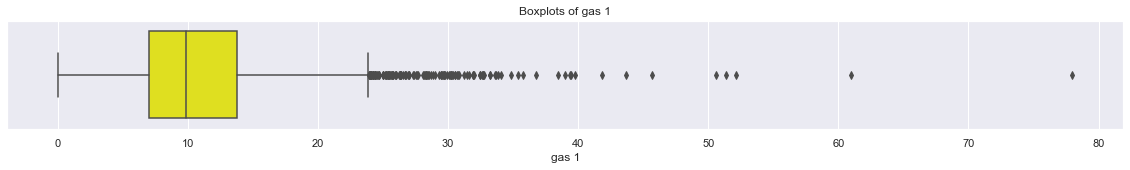

count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: gas 1, dtype: float64

In [18]:
data_gas.columns = ['key', 'gas 1']
boxplot(data_gas, 'gas 1', 'yellow')
display(data_gas['gas 1'].describe())

On average, gas 1 has a value of 9-11, in most cases the value does not exceed 25. The minimum and maximum value, respectively, 0.008399 and 77,995040.
Some anomalous values are allocated above 60.

**The total table will include a feature gas 1 '**

### data_temp

1. Create a table with first and last temperature measurements.
2. Create a column with info about the process time 'total process time' (the difference between the last and first temperature measurement)
3. build a boxplot with a process duration
4. We construct boxplots and customized distplots for first and last temperature on one chart.

In [19]:
data_temp.columns = ['key', 'time measurement', 'temp']
data_temp['time measurement'] = pd.to_datetime(data_temp['time measurement'])

In [20]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   key               15907 non-null  int64         
 1   time measurement  15907 non-null  datetime64[ns]
 2   temp              13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


Fill missed values by flag 9999

In [21]:
data_temp = data_temp.fillna(9999)

In [22]:
# Tables with the first and last rows of groups (parties)
data_temp_first = data_temp.sort_values('time measurement').groupby('key').first()
data_temp_last = data_temp.sort_values('time measurement').groupby('key').last()

In [23]:
data_temp_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 1 to 3241
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time measurement  3216 non-null   datetime64[ns]
 1   temp              3216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 75.4 KB


In [24]:
data_temp_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 1 to 3241
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time measurement  3216 non-null   datetime64[ns]
 1   temp              3216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 75.4 KB


In [25]:
# Calculated table with first and last temperature measurements
data_temp_calc = data_temp_first.merge(data_temp_last, left_on='key', right_on='key')
data_temp_calc.reset_index(level=['key'], inplace=True)
data_temp_calc.columns = ['key', 'start', 'first temp', 'end', 'last temp']

Remove columns with flag 9999

In [26]:
data_temp_calc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   key         3216 non-null   int64         
 1   start       3216 non-null   datetime64[ns]
 2   first temp  3216 non-null   float64       
 3   end         3216 non-null   datetime64[ns]
 4   last temp   3216 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 125.8 KB


In [27]:
data_temp_calc=data_temp_calc[data_temp_calc['first temp']!=9999]
data_temp_calc=data_temp_calc[data_temp_calc['last temp']!=9999]

In [28]:
data_temp_calc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2477 entries, 0 to 2476
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   key         2477 non-null   int64         
 1   start       2477 non-null   datetime64[ns]
 2   first temp  2477 non-null   float64       
 3   end         2477 non-null   datetime64[ns]
 4   last temp   2477 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 116.1 KB


In [29]:
# Duration of time between the first and last measurement of temperature
data_temp_calc['total time'] = (data_temp_calc['end']-data_temp_calc['start']).astype('timedelta64[s]')

Remove from the table row, in which the duration of time between the first and last measurement of the temperature is 0. In these cases, the process did not occur, or the final alloy temperature immediately had the necessary value.

In [30]:
data_temp_calc = data_temp_calc[data_temp_calc['total time'] > 0]

In [31]:
display(data_temp_calc.head(5))

,key,start,first temp,end,last temp,total time
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0,861.0
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0,1305.0
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0,1300.0
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0,388.0
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0,762.0


Construct boxplot diagram with a process duration

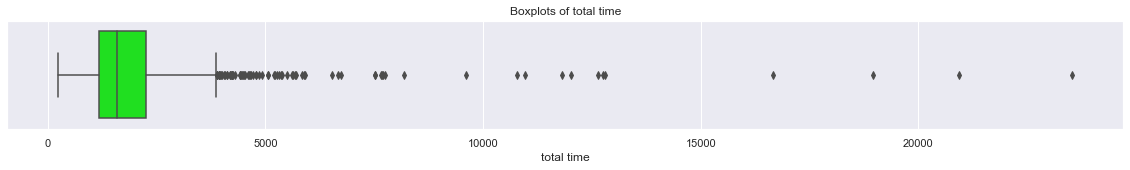

count     2475.000000
mean      1854.953939
std       1301.241764
min        234.000000
25%       1182.500000
50%       1593.000000
75%       2262.500000
max      23537.000000
Name: total time, dtype: float64

In [32]:
boxplot(data_temp_calc, 'total time', 'lime')
display(data_temp_calc['total time'].describe())

On average, the process proceeds about 1500 seconds (25 min) with a median of 1800 seconds (30min). The minimum duration is 197 seconds. In some cases, the process was delayed up to many hours.
Probably, the technological process, which lasted more than 2.5 hours, occurred with some violations, and these parties can be considered outliers, however, at this stage will not be excluded.

Сonstruct boxplots for the first and last temperatures.

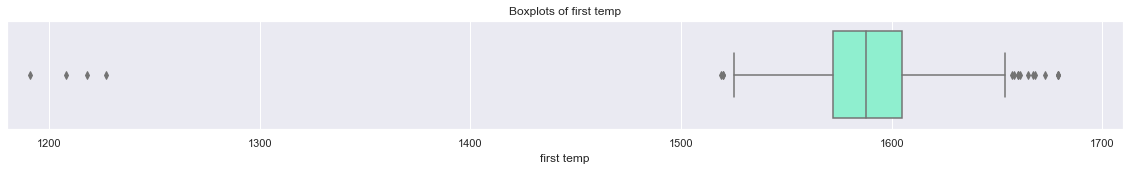

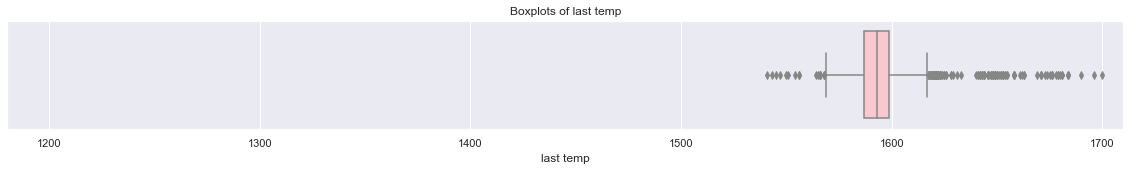

In [33]:
boxplot(data_temp_calc, 'first temp', 'aquamarine', 1180, 1710)
boxplot(data_temp_calc, 'last temp', 'pink', 1180, 1710)

On this boxplot of the first temp we see several anomalies, where the temperature was below 1450 (below the melting point), it may be due to the fault of the temperature sensor, or other errors in production. Delete these outliers.

In [34]:
data_temp_calc = data_temp_calc[data_temp_calc['first temp'] > 1400]
data_temp_calc = data_temp_calc[data_temp_calc['last temp'] > 1400]

Сonstruct Boxplots and Customized Distplot for first and last temperatures:

In [35]:
'''y1 = data_temp_calc['first temp']
y2 = data_temp_calc['last temp']

group_labels = ['first temp', 'last temp']

colors = ['#00bfff', '#ff7f00']
    
fig = make_subplots(rows=2, cols=1, row_heights=[2., 1.])
    
# boxplots
fig.add_trace(go.Box(x=y1, showlegend=False, marker_color='#00bfff', name=group_labels[0]), row=2, col=1)
fig.add_trace(go.Box(x=y2, showlegend=False, marker_color='#ff7f00', name=group_labels[1]), row=2, col=1)
    
# Customized Distplot
hist_data = [y1, y2]
distplfig = ff.create_distplot(hist_data, group_labels, bin_size=5, colors = colors, show_rug=False)

for k in range(len(distplfig.data)):
    fig.add_trace(distplfig.data[k], row=1, col=1)

fig.update_layout(title_text='Boxplots and Customized Distplot with first and last temps')

fig.update_layout(xaxis_title='temperature')
fig.update_layout(yaxis_title='Frequency density')
    
fig.show()'''

"y1 = data_temp_calc['first temp']\ny2 = data_temp_calc['last temp']\n\ngroup_labels = ['first temp', 'last temp']\n\ncolors = ['#00bfff', '#ff7f00']\n    \nfig = make_subplots(rows=2, cols=1, row_heights=[2., 1.])\n    \n# boxplots\nfig.add_trace(go.Box(x=y1, showlegend=False, marker_color='#00bfff', name=group_labels[0]), row=2, col=1)\nfig.add_trace(go.Box(x=y2, showlegend=False, marker_color='#ff7f00', name=group_labels[1]), row=2, col=1)\n    \n# Customized Distplot\nhist_data = [y1, y2]\ndistplfig = ff.create_distplot(hist_data, group_labels, bin_size=5, colors = colors, show_rug=False)\n\nfor k in range(len(distplfig.data)):\n    fig.add_trace(distplfig.data[k], row=1, col=1)\n\nfig.update_layout(title_text='Boxplots and Customized Distplot with first and last temps')\n\nfig.update_layout(xaxis_title='temperature')\nfig.update_layout(yaxis_title='Frequency density')\n    \nfig.show()"

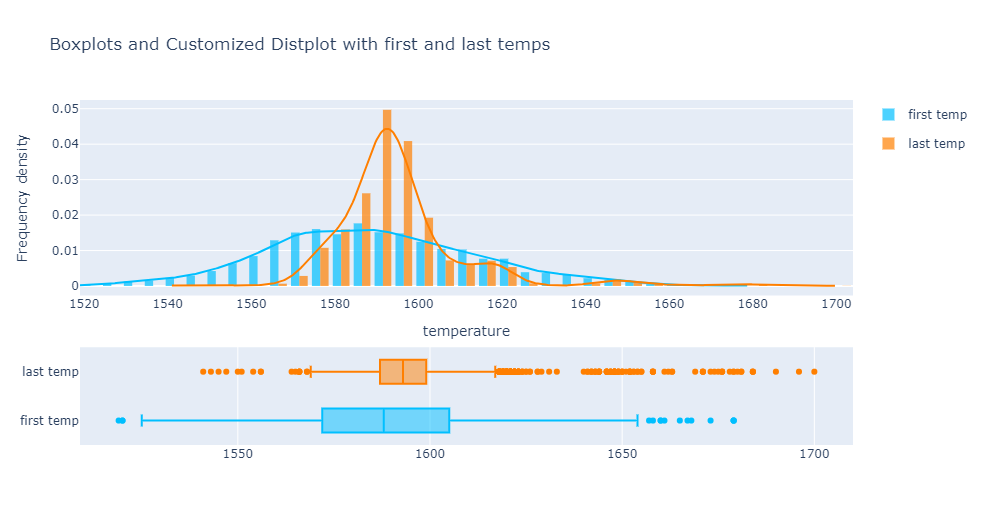

In [36]:
display(data_temp_calc['first temp'].describe())
display(data_temp_calc['last temp'].describe())

count    2471.000000
mean     1589.012950
std        25.004369
min      1519.000000
25%      1572.000000
50%      1588.000000
75%      1605.000000
max      1679.000000
Name: first temp, dtype: float64

count    2471.000000
mean     1595.339943
std        16.035215
min      1541.000000
25%      1587.000000
50%      1593.000000
75%      1599.000000
max      1700.000000
Name: last temp, dtype: float64

On histograms, we see the distribution close to normal. On average, the mean temperature (1593-1594) is higher than the first temperature (1588-1589) and has more stringent relative to the average border values (smaller range), less standard deviation (19-last and 25-first)

**The total table will follow three features:**

**- first temperature**

**- last temperature (target feature)**

**- total time**

### data_wire

The table has missed values, replace them with 0, assuming that the supplement was not used.

We construct Boxplots with info on the volume of wire materials.
Calculate the number of cases of the use of wire materials.

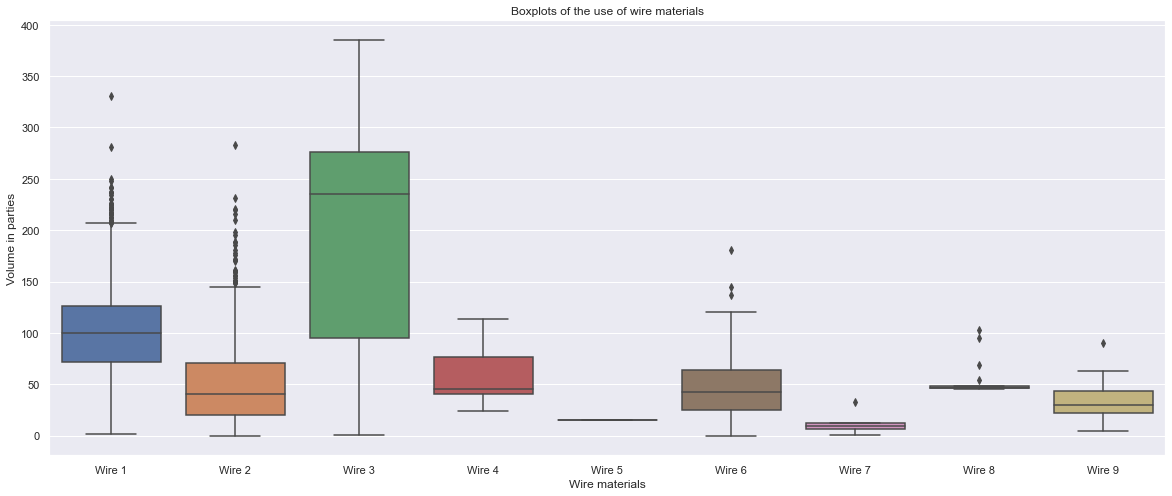

In [37]:
data_wire_only = data_wire.drop('key', 1)
sns.set(rc={'figure.figsize':(20, 8)})
sns.boxplot(x="variable", y="value", data=pd.melt(data_wire_only))
plt.title("Boxplots of the use of wire materials")
plt.ylabel("Volume in parties")
plt.xlabel("Wire materials")

plt.show()

In general, the volumes of wire materials no more than 400. The largest volumes is 3, 1, 4.

Suspiciously looks the diagram from 'Wire 5'. Consider values in the column.

In [38]:
data_wire['Wire 5'].value_counts()

15.132    1
Name: Wire 5, dtype: int64

'Wire 5' used only once, so the columns can be deleted.

In [39]:
data_wire = data_wire.drop(['Wire 5'], axis=1)

In [40]:
# Fill over the missed values
data_wire = data_wire.fillna(0)

The number of cases of the use of wire materials:

In [41]:
data_wire_count = data_wire.astype(bool).sum(axis=0)
display(data_wire_count.drop(data_wire_count.index[0]).sort_values(ascending=False))

Wire 1    3055
Wire 2    1079
Wire 6      73
Wire 3      63
Wire 9      29
Wire 8      19
Wire 4      14
Wire 7      11
dtype: int64

The most often used additives 1, 2. Less frequently: 7, 4

**In the research, we will use information about all additive.**

### data_wire_time

**Information about the time of adding wire materials will not be used in the study, because The target feature does not depend on this feature**

## 2. Summary Table

Merge the necessary data for the study in one table by parties ('Key')

In [42]:
# list of tables for merge
dfs = [data_arc_grouped, data_bulk, data_gas, data_temp_calc, data_wire]

In [43]:
# column 'Key' to the index
data_arc_grouped = data_arc_grouped.set_index('key')
data_bulk = data_bulk.set_index('key')
data_gas = data_gas.set_index('key')
data_temp_calc = data_temp_calc.set_index('key')
data_wire = data_wire.set_index('key')

In [44]:
# merger
data = data_arc_grouped.join([data_bulk, data_gas, data_temp_calc, data_wire], how='inner')

In [45]:
# remove unnecessary
data.drop(['start', 'end'], axis=1, inplace=True)

In [46]:
data = data.astype('int64')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 1 to 2499
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   number of operations  2325 non-null   int64
 1   mean full power       2325 non-null   int64
 2   total act. power      2325 non-null   int64
 3   Bulk 1                2325 non-null   int64
 4   Bulk 2                2325 non-null   int64
 5   Bulk 3                2325 non-null   int64
 6   Bulk 4                2325 non-null   int64
 7   Bulk 5                2325 non-null   int64
 8   Bulk 6                2325 non-null   int64
 9   Bulk 7                2325 non-null   int64
 10  Bulk 9                2325 non-null   int64
 11  Bulk 10               2325 non-null   int64
 12  Bulk 11               2325 non-null   int64
 13  Bulk 12               2325 non-null   int64
 14  Bulk 13               2325 non-null   int64
 15  Bulk 14               2325 non-null   int64
 16  Bulk 1

Check for multicoline and remove features having a coefficient correlations more than 0.75.

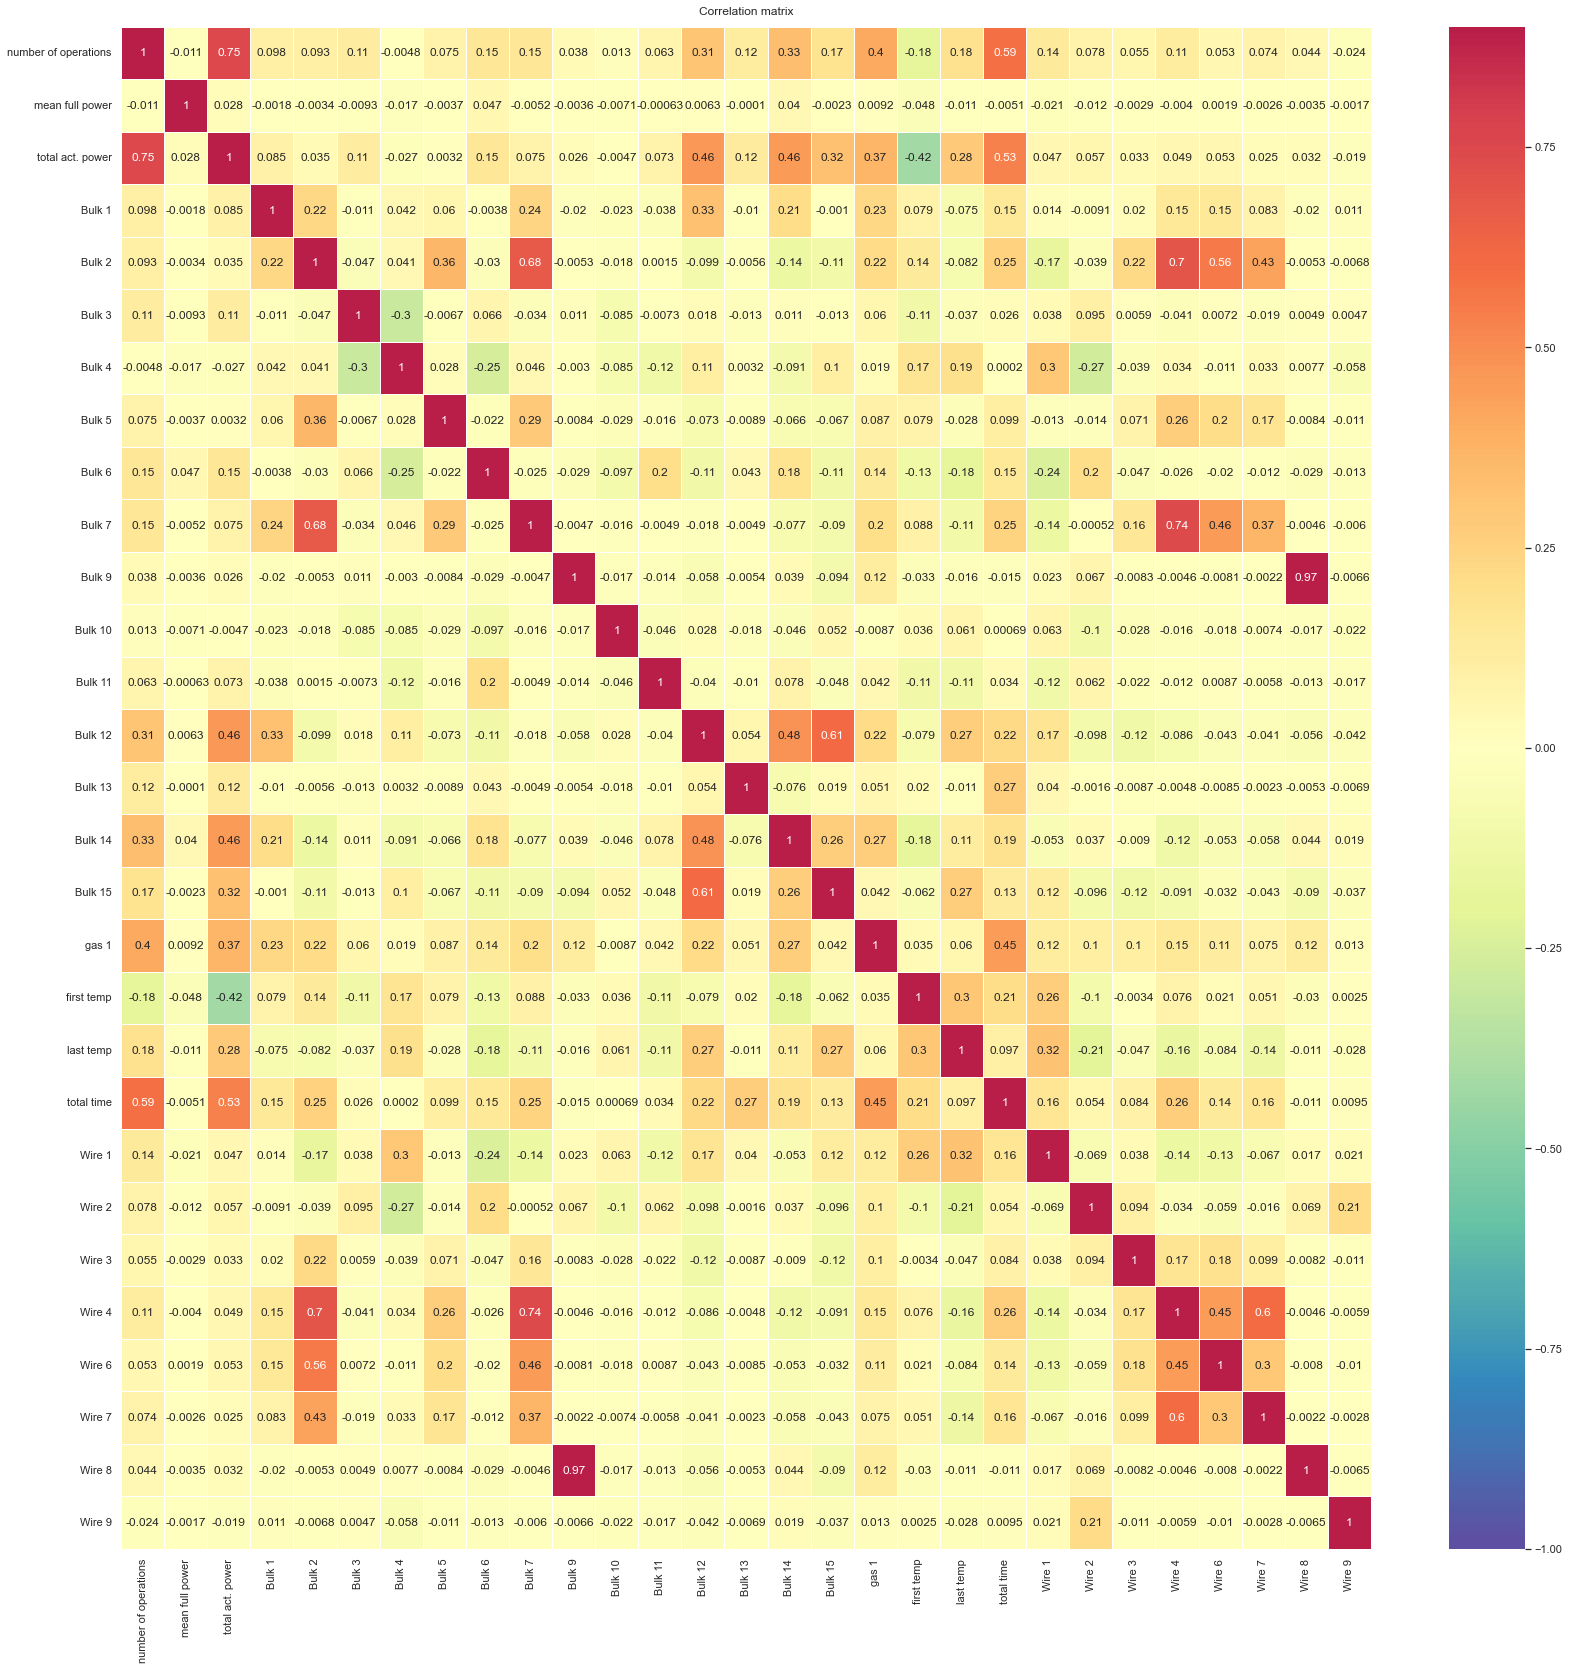

In [48]:
# Correlation matrix
corr = data.corr()
plt.figure(figsize = (28,28))
heatmap = sns.heatmap(corr, fmt='.2g', cmap='Spectral_r', linewidths=1, linecolor='white', vmin=-1, vmax=0.9, center= 0, annot=True)
heatmap.set_title('Correlation matrix', fontdict = {'fontsize': 12}, pad = 12)
plt.show()

In [49]:
# Estimated list of correlators
del_cor_list = set()
cols = list(data.columns)
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        if (abs(data[cols[i]].corr(data[cols[j]]))) >= 0.75:
            del_cor_list.add(cols[j])
        else:
            continue
                   
del_cor_list = list(del_cor_list)

print(del_cor_list)

['Wire 8']


List of features for removal:

In [50]:
# list of features for removal
del_cor_list = ['Wire 8', 'Bulk 7']

In [51]:
# Remove correlating features (while leaving one of the features of a bonds):

data = data.drop(del_cor_list, axis=1)

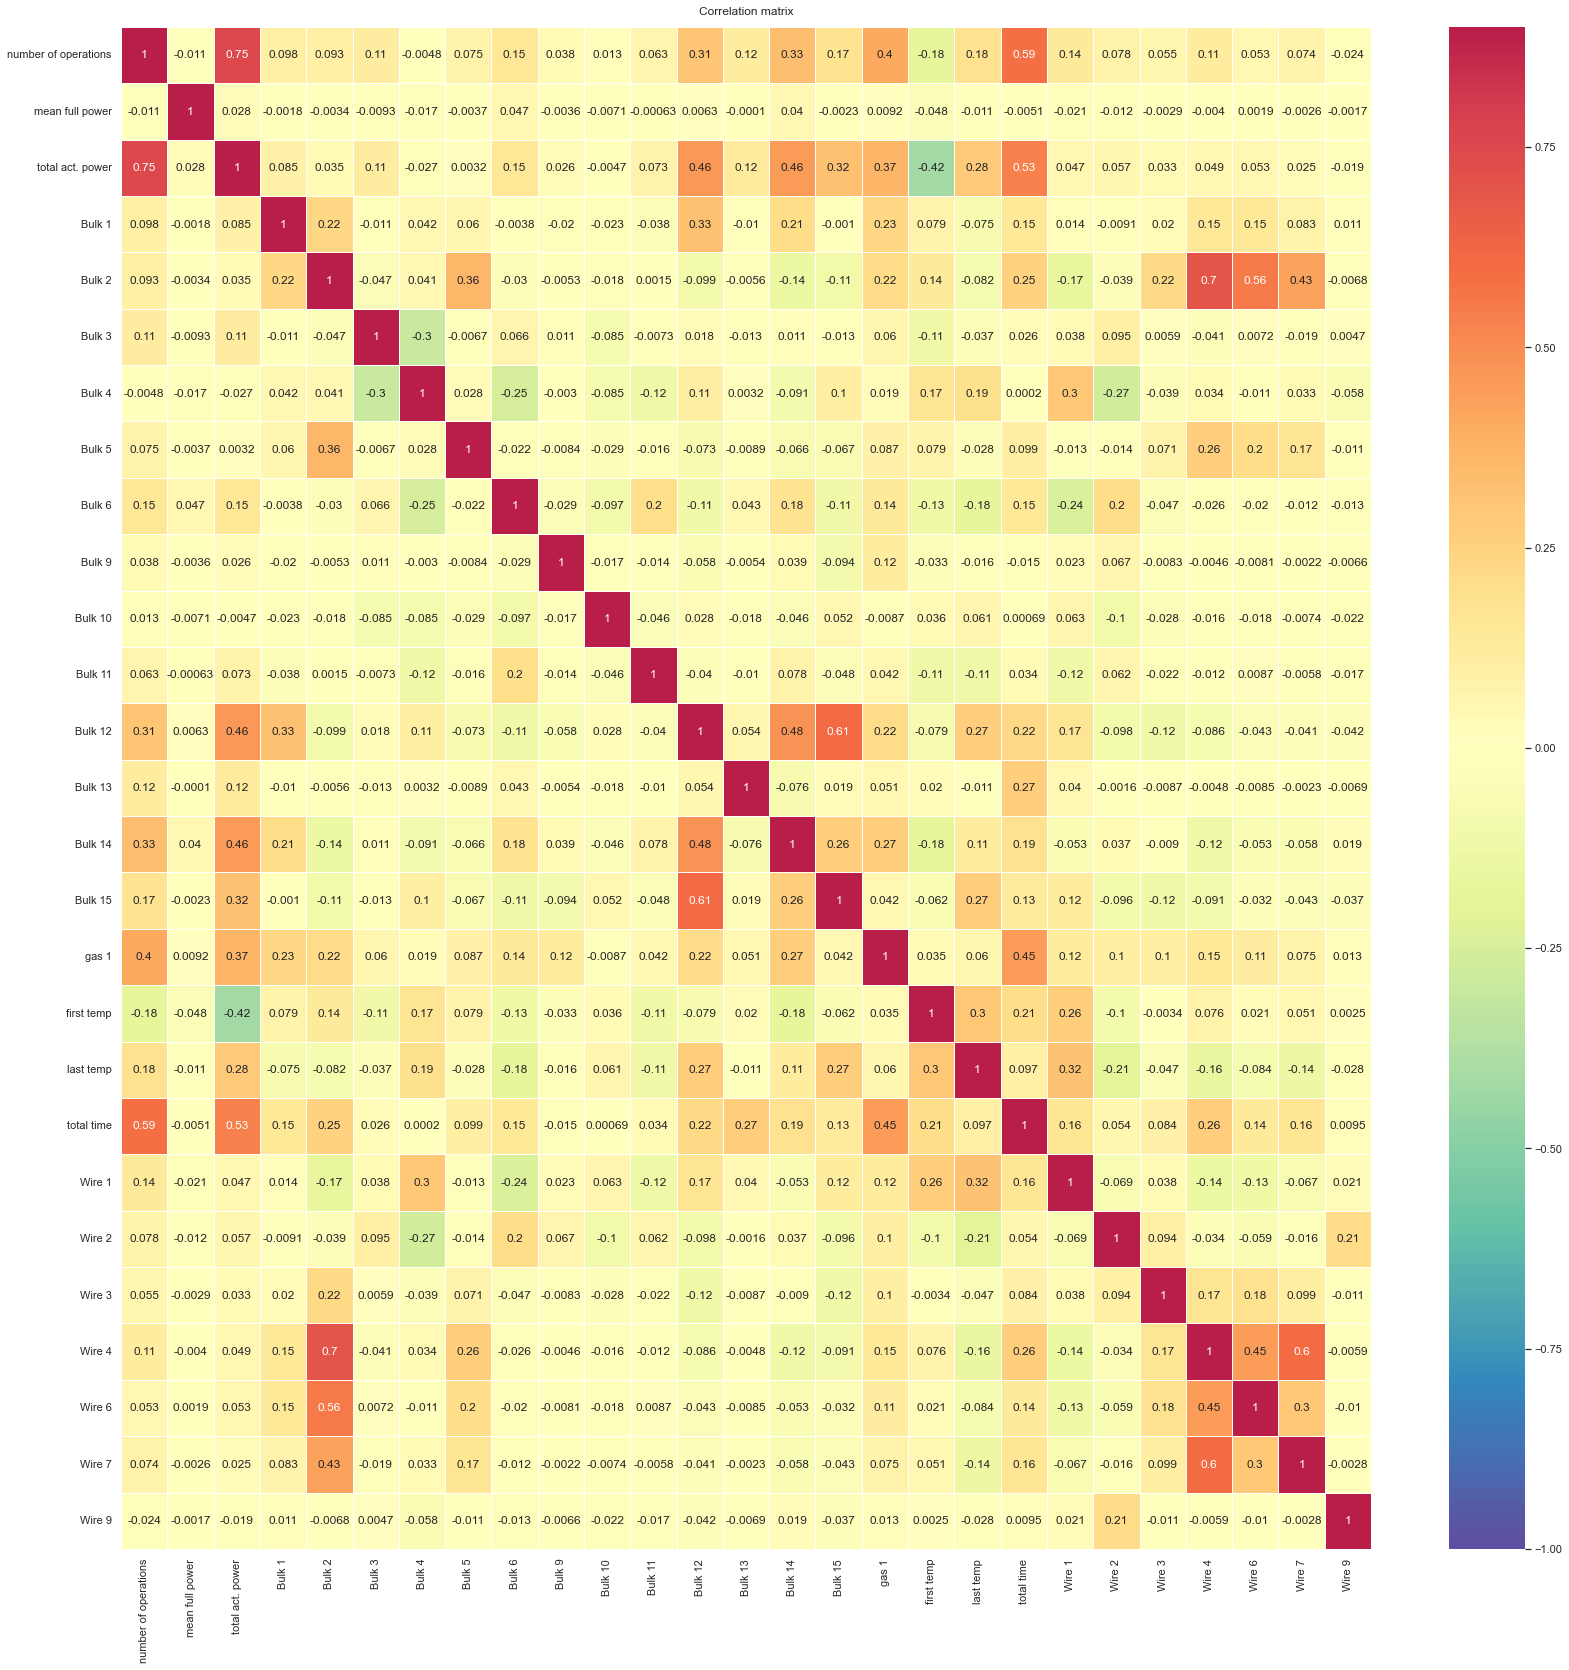

In [52]:
# Correlation matrix
corr = data.corr()
plt.figure(figsize = (28,28))
heatmap = sns.heatmap(corr, fmt='.2g', cmap='Spectral_r', linewidths=1, linecolor='white', vmin=-1, vmax=0.9, center= 0, annot=True)
heatmap.set_title('Correlation matrix', fontdict = {'fontsize': 12}, pad = 12)
plt.show()

**Received a summary table with 27 features and one target feature.**

Rename some columns.

In [53]:
data.rename(columns={'number of operations': 'N_iter',
                    'last temp': 'temp_out'}, inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 1 to 2499
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   N_iter            2325 non-null   int64
 1   mean full power   2325 non-null   int64
 2   total act. power  2325 non-null   int64
 3   Bulk 1            2325 non-null   int64
 4   Bulk 2            2325 non-null   int64
 5   Bulk 3            2325 non-null   int64
 6   Bulk 4            2325 non-null   int64
 7   Bulk 5            2325 non-null   int64
 8   Bulk 6            2325 non-null   int64
 9   Bulk 9            2325 non-null   int64
 10  Bulk 10           2325 non-null   int64
 11  Bulk 11           2325 non-null   int64
 12  Bulk 12           2325 non-null   int64
 13  Bulk 13           2325 non-null   int64
 14  Bulk 14           2325 non-null   int64
 15  Bulk 15           2325 non-null   int64
 16  gas 1             2325 non-null   int64
 17  first temp        2325 non-null  

**Проанализировали и подготовили признаки для обучения модели**

## 3. Training models

There are three models in the research.: LinearRegression, LGBMRegressor, CatBoostRegressor

Select features and target feature

In [55]:
target = data['temp_out']
features = data.drop('temp_out', axis=1)

We divide them on the training and test sample in the ratio of 4/1

In [56]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345)

Scaling of features for linear regression

In [57]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train_st = scaler.transform(features_train)
features_test_st = scaler.transform(features_test)

Metric МАЕ:

In [58]:
def mae(target, prediction):
    return mean_absolute_error(target, prediction)

mae_score = make_scorer(mae, greater_is_better=False)

**Prepared data for learning models.**

### 3.1 LinearRegression

In [59]:
model = LinearRegression()
model.fit(features_train_st, target_train)
predicted_train = model.predict(features_train_st)
predicted_test = model.predict(features_test_st)
result = mean_absolute_error(target_train, predicted_train)
print("MAE of Linear regression models on training sample: {:.3f}".format(result))

MAE of Linear regression models on training sample: 5.722


**On the training sample, MAE is 5,722. This is a good result, less than 8.7 (limit value from the condition)**

### 3.2 LGBMRegressor

In [60]:
lgbm = LGBMRegressor(random_state=42, metric='mae')
parameters_lgbm = {'n_estimators': [350, 352],
                   'max_depth': [9, 11],
                   'learning_rate': [0.019306977288832506, 0.02]}

'''Real parameters used in the learning:
                 'n_estimators': range(100, 211,10),
                  'max_depth': range(3, 54, 10),
                  'learning_rate': np.logspace(0, -4, 15)}'''

"Real parameters used in the learning:\n                 'n_estimators': range(100, 211,10),\n                  'max_depth': range(3, 54, 10),\n                  'learning_rate': np.logspace(0, -4, 15)}"

In [61]:
model_lgbm = GridSearchCV(lgbm, parameters_lgbm, cv=5, scoring=mae_score)

In [62]:
model_lgbm.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(metric='mae', random_state=42),
             param_grid={'learning_rate': [0.019306977288832506, 0.02],
                         'max_depth': [9, 11], 'n_estimators': [350, 352]},
             scoring=make_scorer(mae, greater_is_better=False))

In [63]:
model_lgbm.best_params_

{'learning_rate': 0.019306977288832506, 'max_depth': 9, 'n_estimators': 350}

In [64]:
model_lgbm.best_score_

-5.6055121522197116

The significance of features in the model:

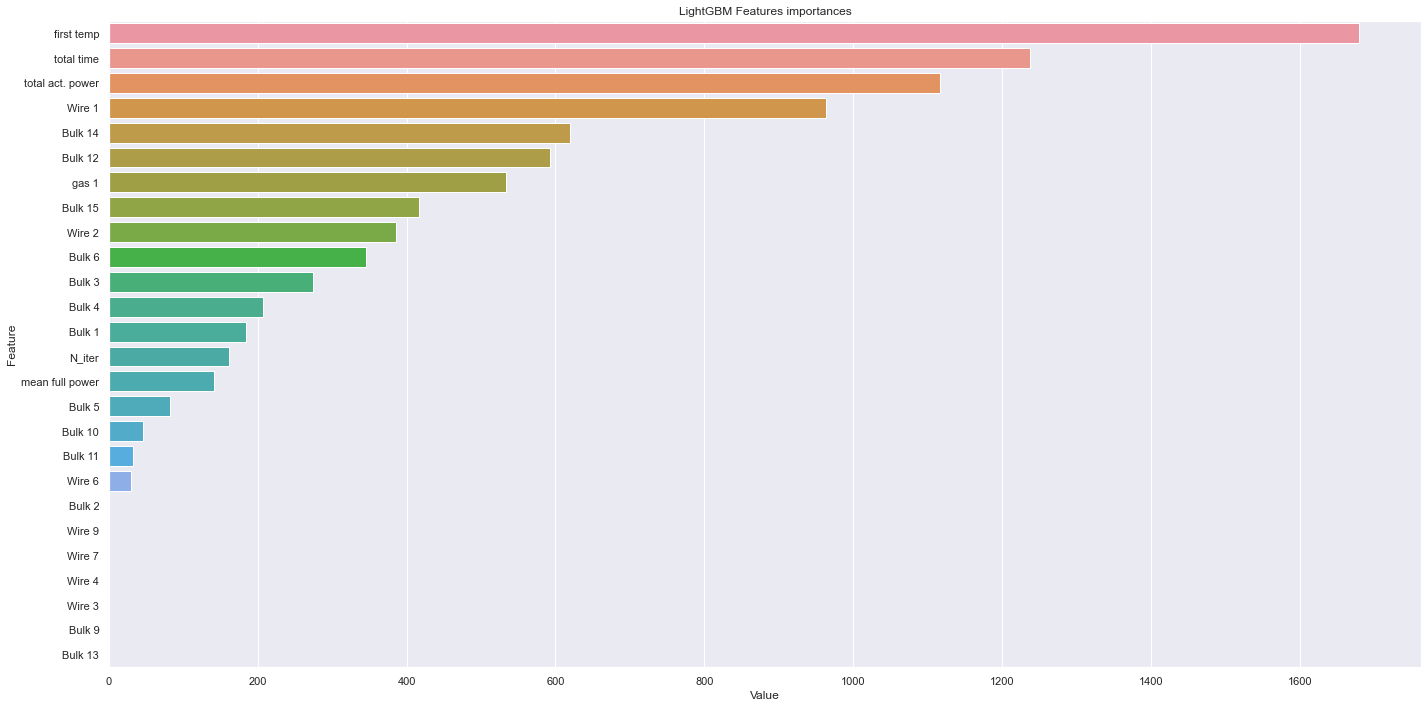

In [65]:
feature_imp = pd.DataFrame(sorted(zip(model_lgbm.best_estimator_.feature_importances_, features_train)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features importances')
plt.tight_layout()
plt.show()

**MAE is 5.6 received on the training sample. This is a good result, less than 8.7 (limit value from the condition).
The most important factors in the model are: first temperature, total time, total active power**

### 3.3 CatBoostRegressor

In [66]:
cat_boost = CatBoostRegressor(loss_function='MAE', random_state=42)
parametrs_cat_boost = {'n_estimators': [450, 451],
                       'max_depth': [4, 6],
                      'learning_rate': [0.01, 0.1]}
model_cat_boost = GridSearchCV(cat_boost, parametrs_cat_boost, cv=5, scoring=mae_score)

'''Real parameters used in the learning:
                 'n_estimators': range(250, 451, 50),
                  'max_depth': range(4, 10),
                  'learning_rate': [0.01, 0.1, 0.3, 0.6, 1]}'''

"Real parameters used in the learning:\n                 'n_estimators': range(250, 451, 50),\n                  'max_depth': range(4, 10),\n                  'learning_rate': [0.01, 0.1, 0.3, 0.6, 1]}"

In [67]:
model_cat_boost.fit(features_train, target_train)

0:	learn: 7.8784936	total: 147ms	remaining: 1m 5s
1:	learn: 7.8660399	total: 149ms	remaining: 33.3s
2:	learn: 7.8500525	total: 150ms	remaining: 22.3s
3:	learn: 7.8318210	total: 151ms	remaining: 16.9s
4:	learn: 7.8149685	total: 153ms	remaining: 13.6s
5:	learn: 7.8068390	total: 154ms	remaining: 11.4s
6:	learn: 7.7926341	total: 155ms	remaining: 9.79s
7:	learn: 7.7781234	total: 156ms	remaining: 8.61s
8:	learn: 7.7693919	total: 157ms	remaining: 7.69s
9:	learn: 7.7528321	total: 158ms	remaining: 6.94s
10:	learn: 7.7411386	total: 159ms	remaining: 6.34s
11:	learn: 7.7252319	total: 160ms	remaining: 5.84s
12:	learn: 7.7133592	total: 161ms	remaining: 5.41s
13:	learn: 7.7005722	total: 162ms	remaining: 5.05s
14:	learn: 7.6870257	total: 163ms	remaining: 4.73s
15:	learn: 7.6716796	total: 164ms	remaining: 4.46s
16:	learn: 7.6628900	total: 165ms	remaining: 4.21s
17:	learn: 7.6418952	total: 166ms	remaining: 3.99s
18:	learn: 7.6276651	total: 167ms	remaining: 3.8s
19:	learn: 7.6165642	total: 169ms	remainin

170:	learn: 6.3649331	total: 330ms	remaining: 539ms
171:	learn: 6.3578541	total: 332ms	remaining: 536ms
172:	learn: 6.3517133	total: 333ms	remaining: 533ms
173:	learn: 6.3482694	total: 334ms	remaining: 530ms
174:	learn: 6.3450191	total: 335ms	remaining: 527ms
175:	learn: 6.3406245	total: 336ms	remaining: 523ms
176:	learn: 6.3340674	total: 337ms	remaining: 520ms
177:	learn: 6.3303594	total: 339ms	remaining: 517ms
178:	learn: 6.3249136	total: 340ms	remaining: 514ms
179:	learn: 6.3214987	total: 341ms	remaining: 511ms
180:	learn: 6.3176920	total: 342ms	remaining: 508ms
181:	learn: 6.3137705	total: 343ms	remaining: 505ms
182:	learn: 6.3096867	total: 344ms	remaining: 502ms
183:	learn: 6.3045061	total: 346ms	remaining: 500ms
184:	learn: 6.3023918	total: 347ms	remaining: 497ms
185:	learn: 6.2991105	total: 348ms	remaining: 494ms
186:	learn: 6.2937544	total: 349ms	remaining: 491ms
187:	learn: 6.2869980	total: 351ms	remaining: 489ms
188:	learn: 6.2833336	total: 352ms	remaining: 486ms
189:	learn: 

1:	learn: 8.0776256	total: 2.33ms	remaining: 522ms
2:	learn: 8.0636684	total: 3.41ms	remaining: 508ms
3:	learn: 8.0428791	total: 4.43ms	remaining: 494ms
4:	learn: 8.0241500	total: 5.39ms	remaining: 480ms
5:	learn: 8.0144584	total: 6.41ms	remaining: 474ms
6:	learn: 7.9992486	total: 7.37ms	remaining: 467ms
7:	learn: 7.9815061	total: 8.34ms	remaining: 461ms
8:	learn: 7.9652295	total: 9.36ms	remaining: 459ms
9:	learn: 7.9504211	total: 10.3ms	remaining: 454ms
10:	learn: 7.9319143	total: 11.3ms	remaining: 450ms
11:	learn: 7.9124735	total: 12.4ms	remaining: 454ms
12:	learn: 7.9009317	total: 13.5ms	remaining: 453ms
13:	learn: 7.8849763	total: 14.5ms	remaining: 451ms
14:	learn: 7.8752304	total: 15.5ms	remaining: 451ms
15:	learn: 7.8575364	total: 16.6ms	remaining: 450ms
16:	learn: 7.8390976	total: 17.6ms	remaining: 448ms
17:	learn: 7.8172993	total: 18.6ms	remaining: 446ms
18:	learn: 7.7997639	total: 19.6ms	remaining: 445ms
19:	learn: 7.7883463	total: 20.8ms	remaining: 448ms
20:	learn: 7.7766208	

170:	learn: 6.4940018	total: 169ms	remaining: 276ms
171:	learn: 6.4877636	total: 170ms	remaining: 275ms
172:	learn: 6.4822637	total: 171ms	remaining: 274ms
173:	learn: 6.4783983	total: 172ms	remaining: 273ms
174:	learn: 6.4731204	total: 173ms	remaining: 272ms
175:	learn: 6.4661360	total: 174ms	remaining: 271ms
176:	learn: 6.4612334	total: 175ms	remaining: 270ms
177:	learn: 6.4574705	total: 176ms	remaining: 269ms
178:	learn: 6.4481130	total: 177ms	remaining: 268ms
179:	learn: 6.4424359	total: 178ms	remaining: 267ms
180:	learn: 6.4394747	total: 179ms	remaining: 266ms
181:	learn: 6.4345311	total: 180ms	remaining: 265ms
182:	learn: 6.4290198	total: 181ms	remaining: 264ms
183:	learn: 6.4260697	total: 182ms	remaining: 263ms
184:	learn: 6.4229096	total: 183ms	remaining: 263ms
185:	learn: 6.4197357	total: 184ms	remaining: 262ms
186:	learn: 6.4149764	total: 185ms	remaining: 261ms
187:	learn: 6.4093023	total: 186ms	remaining: 260ms
188:	learn: 6.4045324	total: 187ms	remaining: 258ms
189:	learn: 

344:	learn: 5.9006479	total: 338ms	remaining: 103ms
345:	learn: 5.8982556	total: 339ms	remaining: 102ms
346:	learn: 5.8954150	total: 340ms	remaining: 101ms
347:	learn: 5.8936313	total: 341ms	remaining: 99.9ms
348:	learn: 5.8917222	total: 342ms	remaining: 98.9ms
349:	learn: 5.8896215	total: 343ms	remaining: 98ms
350:	learn: 5.8858402	total: 344ms	remaining: 97ms
351:	learn: 5.8831461	total: 345ms	remaining: 96ms
352:	learn: 5.8811702	total: 346ms	remaining: 95.1ms
353:	learn: 5.8786644	total: 347ms	remaining: 94.1ms
354:	learn: 5.8757987	total: 348ms	remaining: 93.1ms
355:	learn: 5.8742426	total: 349ms	remaining: 92.2ms
356:	learn: 5.8730579	total: 350ms	remaining: 91.2ms
357:	learn: 5.8699321	total: 351ms	remaining: 90.3ms
358:	learn: 5.8675114	total: 352ms	remaining: 89.3ms
359:	learn: 5.8641772	total: 353ms	remaining: 88.3ms
360:	learn: 5.8623418	total: 354ms	remaining: 87.4ms
361:	learn: 5.8603948	total: 355ms	remaining: 86.4ms
362:	learn: 5.8567016	total: 356ms	remaining: 85.4ms
36

54:	learn: 7.3226971	total: 52.7ms	remaining: 379ms
55:	learn: 7.3140698	total: 53.8ms	remaining: 379ms
56:	learn: 7.3050760	total: 54.9ms	remaining: 379ms
57:	learn: 7.2944071	total: 55.9ms	remaining: 378ms
58:	learn: 7.2810613	total: 57ms	remaining: 378ms
59:	learn: 7.2698400	total: 58.1ms	remaining: 377ms
60:	learn: 7.2635440	total: 59.1ms	remaining: 377ms
61:	learn: 7.2500039	total: 60.2ms	remaining: 377ms
62:	learn: 7.2430696	total: 61.2ms	remaining: 376ms
63:	learn: 7.2337006	total: 62.4ms	remaining: 376ms
64:	learn: 7.2257220	total: 63.4ms	remaining: 376ms
65:	learn: 7.2180626	total: 64.5ms	remaining: 375ms
66:	learn: 7.2099546	total: 65.7ms	remaining: 375ms
67:	learn: 7.2000385	total: 66.8ms	remaining: 375ms
68:	learn: 7.1916802	total: 67.7ms	remaining: 374ms
69:	learn: 7.1850933	total: 68.7ms	remaining: 373ms
70:	learn: 7.1744566	total: 69.6ms	remaining: 372ms
71:	learn: 7.1677457	total: 70.6ms	remaining: 371ms
72:	learn: 7.1615678	total: 71.6ms	remaining: 370ms
73:	learn: 7.1

217:	learn: 6.3537636	total: 217ms	remaining: 231ms
218:	learn: 6.3487568	total: 218ms	remaining: 230ms
219:	learn: 6.3451048	total: 219ms	remaining: 229ms
220:	learn: 6.3402704	total: 220ms	remaining: 228ms
221:	learn: 6.3376563	total: 221ms	remaining: 227ms
222:	learn: 6.3330570	total: 222ms	remaining: 226ms
223:	learn: 6.3303769	total: 223ms	remaining: 225ms
224:	learn: 6.3267638	total: 224ms	remaining: 224ms
225:	learn: 6.3235985	total: 225ms	remaining: 223ms
226:	learn: 6.3216436	total: 226ms	remaining: 222ms
227:	learn: 6.3186459	total: 227ms	remaining: 221ms
228:	learn: 6.3144373	total: 228ms	remaining: 220ms
229:	learn: 6.3116621	total: 230ms	remaining: 220ms
230:	learn: 6.3082816	total: 231ms	remaining: 219ms
231:	learn: 6.3049159	total: 232ms	remaining: 218ms
232:	learn: 6.3004118	total: 233ms	remaining: 217ms
233:	learn: 6.2965680	total: 234ms	remaining: 216ms
234:	learn: 6.2933049	total: 235ms	remaining: 215ms
235:	learn: 6.2892786	total: 236ms	remaining: 214ms
236:	learn: 

385:	learn: 5.9300533	total: 385ms	remaining: 63.8ms
386:	learn: 5.9280766	total: 386ms	remaining: 62.8ms
387:	learn: 5.9264026	total: 387ms	remaining: 61.8ms
388:	learn: 5.9251480	total: 388ms	remaining: 60.8ms
389:	learn: 5.9222655	total: 389ms	remaining: 59.8ms
390:	learn: 5.9205212	total: 390ms	remaining: 58.8ms
391:	learn: 5.9193145	total: 391ms	remaining: 57.8ms
392:	learn: 5.9171138	total: 392ms	remaining: 56.8ms
393:	learn: 5.9152562	total: 393ms	remaining: 55.8ms
394:	learn: 5.9132088	total: 394ms	remaining: 54.8ms
395:	learn: 5.9121498	total: 395ms	remaining: 53.8ms
396:	learn: 5.9109854	total: 396ms	remaining: 52.8ms
397:	learn: 5.9098793	total: 397ms	remaining: 51.8ms
398:	learn: 5.9082692	total: 398ms	remaining: 50.8ms
399:	learn: 5.9071207	total: 399ms	remaining: 49.9ms
400:	learn: 5.9057114	total: 400ms	remaining: 48.9ms
401:	learn: 5.9032230	total: 401ms	remaining: 47.9ms
402:	learn: 5.9016126	total: 402ms	remaining: 46.9ms
403:	learn: 5.8986804	total: 403ms	remaining: 

255:	learn: 6.1361261	total: 245ms	remaining: 186ms
256:	learn: 6.1338394	total: 246ms	remaining: 185ms
257:	learn: 6.1309459	total: 247ms	remaining: 184ms
258:	learn: 6.1272604	total: 248ms	remaining: 183ms
259:	learn: 6.1250409	total: 249ms	remaining: 182ms
260:	learn: 6.1236583	total: 250ms	remaining: 181ms
261:	learn: 6.1212963	total: 251ms	remaining: 180ms
262:	learn: 6.1187194	total: 252ms	remaining: 179ms
263:	learn: 6.1150718	total: 253ms	remaining: 178ms
264:	learn: 6.1111565	total: 254ms	remaining: 178ms
265:	learn: 6.1080342	total: 255ms	remaining: 177ms
266:	learn: 6.1039429	total: 257ms	remaining: 176ms
267:	learn: 6.0983796	total: 258ms	remaining: 175ms
268:	learn: 6.0957728	total: 259ms	remaining: 174ms
269:	learn: 6.0931120	total: 260ms	remaining: 173ms
270:	learn: 6.0896067	total: 261ms	remaining: 172ms
271:	learn: 6.0868154	total: 262ms	remaining: 172ms
272:	learn: 6.0843692	total: 263ms	remaining: 171ms
273:	learn: 6.0825766	total: 264ms	remaining: 170ms
274:	learn: 

430:	learn: 5.7017400	total: 413ms	remaining: 18.2ms
431:	learn: 5.7005924	total: 415ms	remaining: 17.3ms
432:	learn: 5.6981618	total: 416ms	remaining: 16.3ms
433:	learn: 5.6964547	total: 417ms	remaining: 15.4ms
434:	learn: 5.6952257	total: 418ms	remaining: 14.4ms
435:	learn: 5.6928310	total: 419ms	remaining: 13.4ms
436:	learn: 5.6921380	total: 419ms	remaining: 12.5ms
437:	learn: 5.6890879	total: 421ms	remaining: 11.5ms
438:	learn: 5.6877089	total: 422ms	remaining: 10.6ms
439:	learn: 5.6855308	total: 423ms	remaining: 9.6ms
440:	learn: 5.6831165	total: 424ms	remaining: 8.64ms
441:	learn: 5.6820865	total: 425ms	remaining: 7.68ms
442:	learn: 5.6811407	total: 426ms	remaining: 6.72ms
443:	learn: 5.6797097	total: 427ms	remaining: 5.76ms
444:	learn: 5.6786666	total: 428ms	remaining: 4.81ms
445:	learn: 5.6765419	total: 429ms	remaining: 3.85ms
446:	learn: 5.6751402	total: 430ms	remaining: 2.88ms
447:	learn: 5.6732457	total: 431ms	remaining: 1.92ms
448:	learn: 5.6717225	total: 432ms	remaining: 9

295:	learn: 6.0784626	total: 279ms	remaining: 145ms
296:	learn: 6.0763884	total: 280ms	remaining: 144ms
297:	learn: 6.0744696	total: 281ms	remaining: 143ms
298:	learn: 6.0725985	total: 282ms	remaining: 142ms
299:	learn: 6.0701005	total: 283ms	remaining: 141ms
300:	learn: 6.0650919	total: 284ms	remaining: 140ms
301:	learn: 6.0630348	total: 285ms	remaining: 139ms
302:	learn: 6.0608680	total: 286ms	remaining: 139ms
303:	learn: 6.0584785	total: 287ms	remaining: 138ms
304:	learn: 6.0569077	total: 288ms	remaining: 137ms
305:	learn: 6.0549002	total: 289ms	remaining: 136ms
306:	learn: 6.0529337	total: 290ms	remaining: 135ms
307:	learn: 6.0492935	total: 291ms	remaining: 134ms
308:	learn: 6.0460000	total: 292ms	remaining: 133ms
309:	learn: 6.0421937	total: 293ms	remaining: 132ms
310:	learn: 6.0385440	total: 294ms	remaining: 131ms
311:	learn: 6.0359070	total: 295ms	remaining: 130ms
312:	learn: 6.0339082	total: 296ms	remaining: 129ms
313:	learn: 6.0324748	total: 297ms	remaining: 128ms
314:	learn: 

173:	learn: 6.3482694	total: 166ms	remaining: 264ms
174:	learn: 6.3450191	total: 167ms	remaining: 263ms
175:	learn: 6.3406245	total: 168ms	remaining: 262ms
176:	learn: 6.3340674	total: 169ms	remaining: 262ms
177:	learn: 6.3303594	total: 170ms	remaining: 261ms
178:	learn: 6.3249136	total: 171ms	remaining: 260ms
179:	learn: 6.3214987	total: 172ms	remaining: 259ms
180:	learn: 6.3176920	total: 173ms	remaining: 258ms
181:	learn: 6.3137705	total: 174ms	remaining: 257ms
182:	learn: 6.3096867	total: 175ms	remaining: 256ms
183:	learn: 6.3045061	total: 176ms	remaining: 256ms
184:	learn: 6.3023918	total: 177ms	remaining: 255ms
185:	learn: 6.2991105	total: 178ms	remaining: 254ms
186:	learn: 6.2937544	total: 179ms	remaining: 253ms
187:	learn: 6.2869980	total: 180ms	remaining: 252ms
188:	learn: 6.2833336	total: 181ms	remaining: 252ms
189:	learn: 6.2781767	total: 183ms	remaining: 251ms
190:	learn: 6.2752617	total: 184ms	remaining: 250ms
191:	learn: 6.2714645	total: 185ms	remaining: 249ms
192:	learn: 

350:	learn: 5.7563758	total: 343ms	remaining: 97.8ms
351:	learn: 5.7532990	total: 344ms	remaining: 96.8ms
352:	learn: 5.7501249	total: 345ms	remaining: 95.9ms
353:	learn: 5.7482530	total: 346ms	remaining: 94.9ms
354:	learn: 5.7463695	total: 347ms	remaining: 94ms
355:	learn: 5.7441698	total: 349ms	remaining: 93ms
356:	learn: 5.7408924	total: 350ms	remaining: 92.1ms
357:	learn: 5.7379351	total: 351ms	remaining: 91.1ms
358:	learn: 5.7348492	total: 352ms	remaining: 90.1ms
359:	learn: 5.7314978	total: 353ms	remaining: 89.1ms
360:	learn: 5.7285731	total: 354ms	remaining: 88.2ms
361:	learn: 5.7249099	total: 355ms	remaining: 87.2ms
362:	learn: 5.7228916	total: 356ms	remaining: 86.2ms
363:	learn: 5.7212845	total: 357ms	remaining: 85.3ms
364:	learn: 5.7180167	total: 358ms	remaining: 84.3ms
365:	learn: 5.7142783	total: 359ms	remaining: 83.3ms
366:	learn: 5.7121338	total: 360ms	remaining: 82.3ms
367:	learn: 5.7088474	total: 361ms	remaining: 81.4ms
368:	learn: 5.7059313	total: 362ms	remaining: 80.4

214:	learn: 6.2954164	total: 210ms	remaining: 231ms
215:	learn: 6.2909838	total: 211ms	remaining: 230ms
216:	learn: 6.2862666	total: 212ms	remaining: 229ms
217:	learn: 6.2832239	total: 214ms	remaining: 228ms
218:	learn: 6.2798424	total: 214ms	remaining: 227ms
219:	learn: 6.2756517	total: 215ms	remaining: 226ms
220:	learn: 6.2730411	total: 216ms	remaining: 225ms
221:	learn: 6.2679498	total: 218ms	remaining: 224ms
222:	learn: 6.2634424	total: 219ms	remaining: 223ms
223:	learn: 6.2596834	total: 220ms	remaining: 223ms
224:	learn: 6.2574903	total: 221ms	remaining: 222ms
225:	learn: 6.2529950	total: 222ms	remaining: 221ms
226:	learn: 6.2492970	total: 223ms	remaining: 220ms
227:	learn: 6.2472068	total: 224ms	remaining: 219ms
228:	learn: 6.2426803	total: 225ms	remaining: 218ms
229:	learn: 6.2393533	total: 226ms	remaining: 217ms
230:	learn: 6.2368363	total: 227ms	remaining: 216ms
231:	learn: 6.2334188	total: 228ms	remaining: 215ms
232:	learn: 6.2307085	total: 229ms	remaining: 214ms
233:	learn: 

400:	learn: 5.7832141	total: 392ms	remaining: 48.9ms
401:	learn: 5.7814731	total: 393ms	remaining: 47.9ms
402:	learn: 5.7802172	total: 394ms	remaining: 47ms
403:	learn: 5.7787634	total: 395ms	remaining: 46ms
404:	learn: 5.7778168	total: 396ms	remaining: 45ms
405:	learn: 5.7742167	total: 397ms	remaining: 44ms
406:	learn: 5.7713054	total: 398ms	remaining: 43ms
407:	learn: 5.7697927	total: 399ms	remaining: 42.1ms
408:	learn: 5.7676665	total: 400ms	remaining: 41.1ms
409:	learn: 5.7654596	total: 401ms	remaining: 40.1ms
410:	learn: 5.7619090	total: 402ms	remaining: 39.1ms
411:	learn: 5.7597236	total: 403ms	remaining: 38.2ms
412:	learn: 5.7584967	total: 404ms	remaining: 37.2ms
413:	learn: 5.7566092	total: 405ms	remaining: 36.2ms
414:	learn: 5.7545458	total: 406ms	remaining: 35.3ms
415:	learn: 5.7523990	total: 408ms	remaining: 34.3ms
416:	learn: 5.7508027	total: 408ms	remaining: 33.3ms
417:	learn: 5.7487734	total: 409ms	remaining: 32.3ms
418:	learn: 5.7470898	total: 410ms	remaining: 31.3ms
419

241:	learn: 6.2691636	total: 249ms	remaining: 215ms
242:	learn: 6.2650902	total: 250ms	remaining: 214ms
243:	learn: 6.2610088	total: 251ms	remaining: 213ms
244:	learn: 6.2574150	total: 252ms	remaining: 212ms
245:	learn: 6.2554788	total: 253ms	remaining: 211ms
246:	learn: 6.2526414	total: 254ms	remaining: 210ms
247:	learn: 6.2499291	total: 255ms	remaining: 209ms
248:	learn: 6.2452214	total: 256ms	remaining: 208ms
249:	learn: 6.2427527	total: 257ms	remaining: 207ms
250:	learn: 6.2402921	total: 258ms	remaining: 206ms
251:	learn: 6.2383160	total: 259ms	remaining: 205ms
252:	learn: 6.2349918	total: 261ms	remaining: 204ms
253:	learn: 6.2336042	total: 262ms	remaining: 203ms
254:	learn: 6.2316405	total: 263ms	remaining: 202ms
255:	learn: 6.2292318	total: 264ms	remaining: 201ms
256:	learn: 6.2255828	total: 265ms	remaining: 200ms
257:	learn: 6.2235154	total: 266ms	remaining: 199ms
258:	learn: 6.2191633	total: 267ms	remaining: 198ms
259:	learn: 6.2171052	total: 269ms	remaining: 197ms
260:	learn: 

404:	learn: 5.8963146	total: 420ms	remaining: 47.7ms
405:	learn: 5.8945398	total: 421ms	remaining: 46.6ms
406:	learn: 5.8931339	total: 422ms	remaining: 45.6ms
407:	learn: 5.8915090	total: 423ms	remaining: 44.6ms
408:	learn: 5.8907353	total: 424ms	remaining: 43.6ms
409:	learn: 5.8896293	total: 426ms	remaining: 42.6ms
410:	learn: 5.8873747	total: 427ms	remaining: 41.6ms
411:	learn: 5.8857116	total: 428ms	remaining: 40.5ms
412:	learn: 5.8837294	total: 429ms	remaining: 39.5ms
413:	learn: 5.8826301	total: 431ms	remaining: 38.5ms
414:	learn: 5.8796643	total: 432ms	remaining: 37.5ms
415:	learn: 5.8783896	total: 433ms	remaining: 36.4ms
416:	learn: 5.8769903	total: 434ms	remaining: 35.4ms
417:	learn: 5.8750127	total: 436ms	remaining: 34.4ms
418:	learn: 5.8739586	total: 437ms	remaining: 33.4ms
419:	learn: 5.8705807	total: 438ms	remaining: 32.3ms
420:	learn: 5.8698505	total: 439ms	remaining: 31.3ms
421:	learn: 5.8682467	total: 440ms	remaining: 30.2ms
422:	learn: 5.8672865	total: 441ms	remaining: 

261:	learn: 6.1212963	total: 273ms	remaining: 197ms
262:	learn: 6.1187194	total: 274ms	remaining: 196ms
263:	learn: 6.1150718	total: 275ms	remaining: 195ms
264:	learn: 6.1111565	total: 276ms	remaining: 194ms
265:	learn: 6.1080342	total: 277ms	remaining: 193ms
266:	learn: 6.1039429	total: 278ms	remaining: 192ms
267:	learn: 6.0983796	total: 279ms	remaining: 190ms
268:	learn: 6.0957728	total: 280ms	remaining: 189ms
269:	learn: 6.0931120	total: 281ms	remaining: 188ms
270:	learn: 6.0896067	total: 282ms	remaining: 187ms
271:	learn: 6.0868154	total: 283ms	remaining: 186ms
272:	learn: 6.0843692	total: 284ms	remaining: 185ms
273:	learn: 6.0825766	total: 286ms	remaining: 184ms
274:	learn: 6.0794904	total: 287ms	remaining: 183ms
275:	learn: 6.0745397	total: 288ms	remaining: 182ms
276:	learn: 6.0708893	total: 289ms	remaining: 181ms
277:	learn: 6.0688255	total: 290ms	remaining: 180ms
278:	learn: 6.0655045	total: 291ms	remaining: 179ms
279:	learn: 6.0632756	total: 292ms	remaining: 178ms
280:	learn: 

426:	learn: 5.7091781	total: 441ms	remaining: 24.8ms
427:	learn: 5.7077194	total: 442ms	remaining: 23.8ms
428:	learn: 5.7054789	total: 444ms	remaining: 22.7ms
429:	learn: 5.7044006	total: 445ms	remaining: 21.7ms
430:	learn: 5.7017400	total: 446ms	remaining: 20.7ms
431:	learn: 5.7005924	total: 447ms	remaining: 19.6ms
432:	learn: 5.6981618	total: 448ms	remaining: 18.6ms
433:	learn: 5.6964547	total: 449ms	remaining: 17.6ms
434:	learn: 5.6952257	total: 450ms	remaining: 16.5ms
435:	learn: 5.6928310	total: 451ms	remaining: 15.5ms
436:	learn: 5.6921380	total: 452ms	remaining: 14.5ms
437:	learn: 5.6890879	total: 453ms	remaining: 13.4ms
438:	learn: 5.6877089	total: 454ms	remaining: 12.4ms
439:	learn: 5.6855308	total: 463ms	remaining: 11.6ms
440:	learn: 5.6831165	total: 464ms	remaining: 10.5ms
441:	learn: 5.6820865	total: 466ms	remaining: 9.48ms
442:	learn: 5.6811407	total: 467ms	remaining: 8.43ms
443:	learn: 5.6797097	total: 468ms	remaining: 7.38ms
444:	learn: 5.6786666	total: 470ms	remaining: 

247:	learn: 6.2166322	total: 258ms	remaining: 211ms
248:	learn: 6.2134148	total: 259ms	remaining: 210ms
249:	learn: 6.2090851	total: 260ms	remaining: 209ms
250:	learn: 6.2067072	total: 261ms	remaining: 208ms
251:	learn: 6.2047695	total: 262ms	remaining: 207ms
252:	learn: 6.2012222	total: 263ms	remaining: 206ms
253:	learn: 6.1986827	total: 264ms	remaining: 205ms
254:	learn: 6.1949775	total: 265ms	remaining: 204ms
255:	learn: 6.1914324	total: 267ms	remaining: 203ms
256:	learn: 6.1887461	total: 268ms	remaining: 202ms
257:	learn: 6.1867050	total: 269ms	remaining: 201ms
258:	learn: 6.1839205	total: 270ms	remaining: 200ms
259:	learn: 6.1813891	total: 271ms	remaining: 199ms
260:	learn: 6.1792014	total: 272ms	remaining: 198ms
261:	learn: 6.1749614	total: 273ms	remaining: 197ms
262:	learn: 6.1723955	total: 274ms	remaining: 196ms
263:	learn: 6.1700164	total: 275ms	remaining: 195ms
264:	learn: 6.1669472	total: 276ms	remaining: 194ms
265:	learn: 6.1632535	total: 277ms	remaining: 193ms
266:	learn: 

430:	learn: 5.7721881	total: 442ms	remaining: 20.5ms
431:	learn: 5.7708077	total: 443ms	remaining: 19.5ms
432:	learn: 5.7678170	total: 444ms	remaining: 18.5ms
433:	learn: 5.7658457	total: 445ms	remaining: 17.4ms
434:	learn: 5.7646264	total: 446ms	remaining: 16.4ms
435:	learn: 5.7622577	total: 447ms	remaining: 15.4ms
436:	learn: 5.7609247	total: 448ms	remaining: 14.4ms
437:	learn: 5.7580598	total: 449ms	remaining: 13.3ms
438:	learn: 5.7566394	total: 450ms	remaining: 12.3ms
439:	learn: 5.7549679	total: 451ms	remaining: 11.3ms
440:	learn: 5.7532715	total: 452ms	remaining: 10.3ms
441:	learn: 5.7514883	total: 453ms	remaining: 9.23ms
442:	learn: 5.7503822	total: 454ms	remaining: 8.21ms
443:	learn: 5.7486700	total: 456ms	remaining: 7.18ms
444:	learn: 5.7470530	total: 457ms	remaining: 6.16ms
445:	learn: 5.7446493	total: 458ms	remaining: 5.13ms
446:	learn: 5.7419508	total: 459ms	remaining: 4.11ms
447:	learn: 5.7407218	total: 460ms	remaining: 3.08ms
448:	learn: 5.7386172	total: 461ms	remaining: 

150:	learn: 6.0716670	total: 286ms	remaining: 566ms
151:	learn: 6.0644177	total: 288ms	remaining: 565ms
152:	learn: 6.0577691	total: 290ms	remaining: 563ms
153:	learn: 6.0514235	total: 292ms	remaining: 562ms
154:	learn: 6.0453444	total: 294ms	remaining: 560ms
155:	learn: 6.0358914	total: 296ms	remaining: 558ms
156:	learn: 6.0271890	total: 298ms	remaining: 557ms
157:	learn: 6.0179438	total: 300ms	remaining: 555ms
158:	learn: 6.0106862	total: 302ms	remaining: 554ms
159:	learn: 6.0076971	total: 304ms	remaining: 552ms
160:	learn: 6.0003162	total: 306ms	remaining: 550ms
161:	learn: 5.9970237	total: 308ms	remaining: 548ms
162:	learn: 5.9905405	total: 310ms	remaining: 546ms
163:	learn: 5.9863588	total: 312ms	remaining: 544ms
164:	learn: 5.9779206	total: 314ms	remaining: 542ms
165:	learn: 5.9722282	total: 316ms	remaining: 540ms
166:	learn: 5.9668943	total: 318ms	remaining: 539ms
167:	learn: 5.9591216	total: 320ms	remaining: 536ms
168:	learn: 5.9532980	total: 322ms	remaining: 535ms
169:	learn: 

340:	learn: 5.2173434	total: 641ms	remaining: 205ms
341:	learn: 5.2145154	total: 643ms	remaining: 203ms
342:	learn: 5.2108526	total: 645ms	remaining: 201ms
343:	learn: 5.2084685	total: 647ms	remaining: 199ms
344:	learn: 5.2063377	total: 649ms	remaining: 198ms
345:	learn: 5.2029599	total: 651ms	remaining: 196ms
346:	learn: 5.2001674	total: 653ms	remaining: 194ms
347:	learn: 5.1975305	total: 655ms	remaining: 192ms
348:	learn: 5.1951290	total: 657ms	remaining: 190ms
349:	learn: 5.1924267	total: 659ms	remaining: 188ms
350:	learn: 5.1903362	total: 661ms	remaining: 186ms
351:	learn: 5.1877024	total: 663ms	remaining: 185ms
352:	learn: 5.1852450	total: 665ms	remaining: 183ms
353:	learn: 5.1822330	total: 667ms	remaining: 181ms
354:	learn: 5.1804101	total: 668ms	remaining: 179ms
355:	learn: 5.1774851	total: 670ms	remaining: 177ms
356:	learn: 5.1742220	total: 672ms	remaining: 175ms
357:	learn: 5.1719607	total: 674ms	remaining: 173ms
358:	learn: 5.1690650	total: 676ms	remaining: 171ms
359:	learn: 

52:	learn: 7.1812751	total: 95ms	remaining: 712ms
53:	learn: 7.1665344	total: 97.1ms	remaining: 712ms
54:	learn: 7.1514043	total: 98.9ms	remaining: 711ms
55:	learn: 7.1436591	total: 101ms	remaining: 710ms
56:	learn: 7.1304890	total: 103ms	remaining: 709ms
57:	learn: 7.1162283	total: 105ms	remaining: 708ms
58:	learn: 7.1045639	total: 107ms	remaining: 707ms
59:	learn: 7.0939935	total: 109ms	remaining: 707ms
60:	learn: 7.0791293	total: 111ms	remaining: 706ms
61:	learn: 7.0652038	total: 113ms	remaining: 704ms
62:	learn: 7.0522472	total: 114ms	remaining: 703ms
63:	learn: 7.0415369	total: 116ms	remaining: 702ms
64:	learn: 7.0251342	total: 118ms	remaining: 701ms
65:	learn: 7.0111289	total: 120ms	remaining: 699ms
66:	learn: 6.9964663	total: 122ms	remaining: 697ms
67:	learn: 6.9850376	total: 124ms	remaining: 697ms
68:	learn: 6.9748562	total: 126ms	remaining: 695ms
69:	learn: 6.9629600	total: 128ms	remaining: 693ms
70:	learn: 6.9523051	total: 130ms	remaining: 692ms
71:	learn: 6.9392152	total: 13

250:	learn: 5.6903361	total: 459ms	remaining: 364ms
251:	learn: 5.6860565	total: 461ms	remaining: 362ms
252:	learn: 5.6822466	total: 463ms	remaining: 361ms
253:	learn: 5.6786772	total: 465ms	remaining: 359ms
254:	learn: 5.6749654	total: 467ms	remaining: 357ms
255:	learn: 5.6709582	total: 469ms	remaining: 355ms
256:	learn: 5.6670096	total: 471ms	remaining: 354ms
257:	learn: 5.6630455	total: 473ms	remaining: 352ms
258:	learn: 5.6606651	total: 475ms	remaining: 350ms
259:	learn: 5.6568914	total: 477ms	remaining: 348ms
260:	learn: 5.6506524	total: 479ms	remaining: 347ms
261:	learn: 5.6461454	total: 481ms	remaining: 345ms
262:	learn: 5.6411562	total: 482ms	remaining: 343ms
263:	learn: 5.6360815	total: 484ms	remaining: 341ms
264:	learn: 5.6329256	total: 486ms	remaining: 339ms
265:	learn: 5.6293510	total: 488ms	remaining: 338ms
266:	learn: 5.6247504	total: 490ms	remaining: 336ms
267:	learn: 5.6205172	total: 492ms	remaining: 334ms
268:	learn: 5.6169564	total: 493ms	remaining: 332ms
269:	learn: 

447:	learn: 5.0804896	total: 823ms	remaining: 3.67ms
448:	learn: 5.0777744	total: 825ms	remaining: 1.84ms
449:	learn: 5.0754370	total: 827ms	remaining: 0us
0:	learn: 7.9546092	total: 2.14ms	remaining: 962ms
1:	learn: 7.9380471	total: 4.02ms	remaining: 900ms
2:	learn: 7.9175397	total: 5.98ms	remaining: 892ms
3:	learn: 7.9005840	total: 8.01ms	remaining: 893ms
4:	learn: 7.8852435	total: 9.91ms	remaining: 882ms
5:	learn: 7.8654722	total: 11.9ms	remaining: 881ms
6:	learn: 7.8499995	total: 13.7ms	remaining: 870ms
7:	learn: 7.8285577	total: 15.7ms	remaining: 868ms
8:	learn: 7.8100029	total: 17.7ms	remaining: 868ms
9:	learn: 7.7916057	total: 19.6ms	remaining: 862ms
10:	learn: 7.7709807	total: 21.5ms	remaining: 858ms
11:	learn: 7.7489390	total: 23.6ms	remaining: 860ms
12:	learn: 7.7283508	total: 25.5ms	remaining: 857ms
13:	learn: 7.7137301	total: 27.5ms	remaining: 856ms
14:	learn: 7.6977975	total: 29.4ms	remaining: 854ms
15:	learn: 7.6786787	total: 31.4ms	remaining: 853ms
16:	learn: 7.6606423	t

164:	learn: 6.1861545	total: 323ms	remaining: 559ms
165:	learn: 6.1810534	total: 325ms	remaining: 557ms
166:	learn: 6.1762905	total: 328ms	remaining: 555ms
167:	learn: 6.1695405	total: 330ms	remaining: 553ms
168:	learn: 6.1614877	total: 332ms	remaining: 552ms
169:	learn: 6.1542493	total: 334ms	remaining: 550ms
170:	learn: 6.1471315	total: 336ms	remaining: 548ms
171:	learn: 6.1447094	total: 337ms	remaining: 544ms
172:	learn: 6.1356030	total: 339ms	remaining: 543ms
173:	learn: 6.1312830	total: 341ms	remaining: 541ms
174:	learn: 6.1242607	total: 343ms	remaining: 538ms
175:	learn: 6.1186030	total: 345ms	remaining: 536ms
176:	learn: 6.1115217	total: 346ms	remaining: 534ms
177:	learn: 6.1063791	total: 348ms	remaining: 532ms
178:	learn: 6.1022485	total: 350ms	remaining: 530ms
179:	learn: 6.0993804	total: 352ms	remaining: 528ms
180:	learn: 6.0958325	total: 354ms	remaining: 526ms
181:	learn: 6.0917921	total: 356ms	remaining: 524ms
182:	learn: 6.0879898	total: 358ms	remaining: 522ms
183:	learn: 

349:	learn: 5.4545028	total: 684ms	remaining: 195ms
350:	learn: 5.4521336	total: 686ms	remaining: 194ms
351:	learn: 5.4506799	total: 688ms	remaining: 192ms
352:	learn: 5.4489706	total: 690ms	remaining: 190ms
353:	learn: 5.4449171	total: 692ms	remaining: 188ms
354:	learn: 5.4425590	total: 694ms	remaining: 186ms
355:	learn: 5.4392059	total: 697ms	remaining: 184ms
356:	learn: 5.4367809	total: 699ms	remaining: 182ms
357:	learn: 5.4331873	total: 701ms	remaining: 180ms
358:	learn: 5.4302744	total: 703ms	remaining: 178ms
359:	learn: 5.4276414	total: 705ms	remaining: 176ms
360:	learn: 5.4245423	total: 707ms	remaining: 174ms
361:	learn: 5.4220237	total: 709ms	remaining: 172ms
362:	learn: 5.4189761	total: 711ms	remaining: 170ms
363:	learn: 5.4167979	total: 713ms	remaining: 168ms
364:	learn: 5.4143003	total: 715ms	remaining: 167ms
365:	learn: 5.4116542	total: 717ms	remaining: 165ms
366:	learn: 5.4073167	total: 719ms	remaining: 163ms
367:	learn: 5.4038743	total: 721ms	remaining: 161ms
368:	learn: 

138:	learn: 6.2825461	total: 277ms	remaining: 621ms
139:	learn: 6.2727945	total: 279ms	remaining: 619ms
140:	learn: 6.2652994	total: 281ms	remaining: 617ms
141:	learn: 6.2570462	total: 283ms	remaining: 614ms
142:	learn: 6.2520778	total: 285ms	remaining: 612ms
143:	learn: 6.2442305	total: 287ms	remaining: 610ms
144:	learn: 6.2365906	total: 289ms	remaining: 608ms
145:	learn: 6.2293071	total: 291ms	remaining: 605ms
146:	learn: 6.2221156	total: 293ms	remaining: 604ms
147:	learn: 6.2151113	total: 295ms	remaining: 602ms
148:	learn: 6.2091137	total: 297ms	remaining: 600ms
149:	learn: 6.2008418	total: 299ms	remaining: 598ms
150:	learn: 6.1937458	total: 301ms	remaining: 596ms
151:	learn: 6.1877222	total: 303ms	remaining: 594ms
152:	learn: 6.1827554	total: 305ms	remaining: 592ms
153:	learn: 6.1748746	total: 307ms	remaining: 590ms
154:	learn: 6.1681184	total: 309ms	remaining: 589ms
155:	learn: 6.1615564	total: 311ms	remaining: 587ms
156:	learn: 6.1555641	total: 313ms	remaining: 585ms
157:	learn: 

322:	learn: 5.3894797	total: 631ms	remaining: 248ms
323:	learn: 5.3856112	total: 633ms	remaining: 246ms
324:	learn: 5.3822824	total: 634ms	remaining: 244ms
325:	learn: 5.3775753	total: 636ms	remaining: 242ms
326:	learn: 5.3748371	total: 638ms	remaining: 240ms
327:	learn: 5.3721420	total: 640ms	remaining: 238ms
328:	learn: 5.3688160	total: 642ms	remaining: 236ms
329:	learn: 5.3663665	total: 644ms	remaining: 234ms
330:	learn: 5.3636355	total: 647ms	remaining: 232ms
331:	learn: 5.3607485	total: 649ms	remaining: 231ms
332:	learn: 5.3575377	total: 651ms	remaining: 229ms
333:	learn: 5.3546029	total: 653ms	remaining: 227ms
334:	learn: 5.3509391	total: 655ms	remaining: 225ms
335:	learn: 5.3488833	total: 656ms	remaining: 223ms
336:	learn: 5.3462499	total: 658ms	remaining: 221ms
337:	learn: 5.3433343	total: 660ms	remaining: 219ms
338:	learn: 5.3412890	total: 662ms	remaining: 217ms
339:	learn: 5.3371458	total: 664ms	remaining: 215ms
340:	learn: 5.3342642	total: 666ms	remaining: 213ms
341:	learn: 

32:	learn: 7.4547600	total: 60.9ms	remaining: 770ms
33:	learn: 7.4437758	total: 62.9ms	remaining: 769ms
34:	learn: 7.4276934	total: 64.6ms	remaining: 766ms
35:	learn: 7.4122181	total: 66.5ms	remaining: 764ms
36:	learn: 7.4010238	total: 68.3ms	remaining: 762ms
37:	learn: 7.3823191	total: 70.1ms	remaining: 760ms
38:	learn: 7.3667237	total: 71.9ms	remaining: 758ms
39:	learn: 7.3477110	total: 73.8ms	remaining: 756ms
40:	learn: 7.3304126	total: 75.7ms	remaining: 755ms
41:	learn: 7.3165962	total: 77.8ms	remaining: 755ms
42:	learn: 7.3005563	total: 79.8ms	remaining: 755ms
43:	learn: 7.2842620	total: 81.8ms	remaining: 755ms
44:	learn: 7.2693466	total: 83.8ms	remaining: 754ms
45:	learn: 7.2550055	total: 85.8ms	remaining: 753ms
46:	learn: 7.2446459	total: 88ms	remaining: 754ms
47:	learn: 7.2312450	total: 90ms	remaining: 753ms
48:	learn: 7.2181354	total: 92.3ms	remaining: 756ms
49:	learn: 7.2062708	total: 94.3ms	remaining: 754ms
50:	learn: 7.1939111	total: 96.2ms	remaining: 753ms
51:	learn: 7.183

211:	learn: 5.8822059	total: 414ms	remaining: 464ms
212:	learn: 5.8780290	total: 416ms	remaining: 463ms
213:	learn: 5.8743812	total: 418ms	remaining: 461ms
214:	learn: 5.8685686	total: 420ms	remaining: 459ms
215:	learn: 5.8655763	total: 423ms	remaining: 458ms
216:	learn: 5.8621595	total: 425ms	remaining: 456ms
217:	learn: 5.8577571	total: 427ms	remaining: 455ms
218:	learn: 5.8539138	total: 429ms	remaining: 453ms
219:	learn: 5.8516264	total: 431ms	remaining: 451ms
220:	learn: 5.8462094	total: 433ms	remaining: 449ms
221:	learn: 5.8446527	total: 435ms	remaining: 447ms
222:	learn: 5.8402527	total: 437ms	remaining: 445ms
223:	learn: 5.8354646	total: 440ms	remaining: 443ms
224:	learn: 5.8303299	total: 442ms	remaining: 442ms
225:	learn: 5.8275250	total: 444ms	remaining: 440ms
226:	learn: 5.8234201	total: 446ms	remaining: 438ms
227:	learn: 5.8180625	total: 448ms	remaining: 436ms
228:	learn: 5.8151438	total: 450ms	remaining: 434ms
229:	learn: 5.8093981	total: 452ms	remaining: 432ms
230:	learn: 

442:	learn: 5.1422517	total: 942ms	remaining: 14.9ms
443:	learn: 5.1389460	total: 945ms	remaining: 12.8ms
444:	learn: 5.1360500	total: 947ms	remaining: 10.6ms
445:	learn: 5.1340776	total: 949ms	remaining: 8.51ms
446:	learn: 5.1306975	total: 952ms	remaining: 6.39ms
447:	learn: 5.1289307	total: 954ms	remaining: 4.26ms
448:	learn: 5.1275387	total: 956ms	remaining: 2.13ms
449:	learn: 5.1234420	total: 959ms	remaining: 0us
0:	learn: 7.8764439	total: 2.52ms	remaining: 1.13s
1:	learn: 7.8557580	total: 4.57ms	remaining: 1.02s
2:	learn: 7.8325991	total: 6.68ms	remaining: 998ms
3:	learn: 7.8176769	total: 8.8ms	remaining: 983ms
4:	learn: 7.8016330	total: 10.8ms	remaining: 967ms
5:	learn: 7.7835003	total: 13.2ms	remaining: 979ms
6:	learn: 7.7653549	total: 15.2ms	remaining: 966ms
7:	learn: 7.7437863	total: 17.5ms	remaining: 967ms
8:	learn: 7.7199467	total: 19.6ms	remaining: 963ms
9:	learn: 7.6970432	total: 21.6ms	remaining: 953ms
10:	learn: 7.6737459	total: 23.6ms	remaining: 945ms
11:	learn: 7.65403

231:	learn: 5.6146143	total: 489ms	remaining: 462ms
232:	learn: 5.6109072	total: 491ms	remaining: 460ms
233:	learn: 5.6052304	total: 494ms	remaining: 458ms
234:	learn: 5.6015487	total: 496ms	remaining: 456ms
235:	learn: 5.5972210	total: 498ms	remaining: 454ms
236:	learn: 5.5937411	total: 500ms	remaining: 452ms
237:	learn: 5.5886003	total: 502ms	remaining: 450ms
238:	learn: 5.5827881	total: 505ms	remaining: 448ms
239:	learn: 5.5786475	total: 507ms	remaining: 446ms
240:	learn: 5.5730392	total: 510ms	remaining: 444ms
241:	learn: 5.5687478	total: 512ms	remaining: 442ms
242:	learn: 5.5660072	total: 514ms	remaining: 440ms
243:	learn: 5.5608791	total: 516ms	remaining: 438ms
244:	learn: 5.5546035	total: 518ms	remaining: 436ms
245:	learn: 5.5504333	total: 521ms	remaining: 434ms
246:	learn: 5.5461384	total: 523ms	remaining: 432ms
247:	learn: 5.5422615	total: 526ms	remaining: 430ms
248:	learn: 5.5363051	total: 528ms	remaining: 428ms
249:	learn: 5.5301371	total: 530ms	remaining: 426ms
250:	learn: 

393:	learn: 5.0700666	total: 852ms	remaining: 123ms
394:	learn: 5.0676464	total: 854ms	remaining: 121ms
395:	learn: 5.0647976	total: 856ms	remaining: 119ms
396:	learn: 5.0618371	total: 858ms	remaining: 117ms
397:	learn: 5.0584811	total: 860ms	remaining: 115ms
398:	learn: 5.0563886	total: 862ms	remaining: 112ms
399:	learn: 5.0532546	total: 864ms	remaining: 110ms
400:	learn: 5.0498485	total: 866ms	remaining: 108ms
401:	learn: 5.0486701	total: 868ms	remaining: 106ms
402:	learn: 5.0462094	total: 870ms	remaining: 104ms
403:	learn: 5.0448650	total: 872ms	remaining: 101ms
404:	learn: 5.0418459	total: 874ms	remaining: 99.3ms
405:	learn: 5.0387183	total: 877ms	remaining: 97.2ms
406:	learn: 5.0375649	total: 879ms	remaining: 95ms
407:	learn: 5.0342932	total: 881ms	remaining: 92.8ms
408:	learn: 5.0318765	total: 883ms	remaining: 90.7ms
409:	learn: 5.0282244	total: 885ms	remaining: 88.5ms
410:	learn: 5.0248725	total: 887ms	remaining: 86.3ms
411:	learn: 5.0216690	total: 889ms	remaining: 84.2ms
412:	l

184:	learn: 6.0108456	total: 383ms	remaining: 551ms
185:	learn: 6.0064630	total: 385ms	remaining: 548ms
186:	learn: 5.9994812	total: 387ms	remaining: 546ms
187:	learn: 5.9926438	total: 389ms	remaining: 544ms
188:	learn: 5.9862672	total: 391ms	remaining: 542ms
189:	learn: 5.9808194	total: 393ms	remaining: 540ms
190:	learn: 5.9770651	total: 395ms	remaining: 537ms
191:	learn: 5.9730903	total: 397ms	remaining: 535ms
192:	learn: 5.9661839	total: 399ms	remaining: 533ms
193:	learn: 5.9604352	total: 401ms	remaining: 531ms
194:	learn: 5.9538555	total: 403ms	remaining: 529ms
195:	learn: 5.9505789	total: 405ms	remaining: 527ms
196:	learn: 5.9460793	total: 407ms	remaining: 525ms
197:	learn: 5.9407860	total: 409ms	remaining: 523ms
198:	learn: 5.9368475	total: 411ms	remaining: 521ms
199:	learn: 5.9312266	total: 413ms	remaining: 519ms
200:	learn: 5.9243113	total: 415ms	remaining: 517ms
201:	learn: 5.9175868	total: 417ms	remaining: 515ms
202:	learn: 5.9123934	total: 419ms	remaining: 512ms
203:	learn: 

351:	learn: 5.3318848	total: 723ms	remaining: 203ms
352:	learn: 5.3294327	total: 725ms	remaining: 201ms
353:	learn: 5.3271103	total: 727ms	remaining: 199ms
354:	learn: 5.3231998	total: 729ms	remaining: 197ms
355:	learn: 5.3209663	total: 731ms	remaining: 195ms
356:	learn: 5.3160665	total: 733ms	remaining: 193ms
357:	learn: 5.3141468	total: 735ms	remaining: 191ms
358:	learn: 5.3121659	total: 737ms	remaining: 189ms
359:	learn: 5.3096059	total: 739ms	remaining: 187ms
360:	learn: 5.3063227	total: 741ms	remaining: 185ms
361:	learn: 5.3044478	total: 744ms	remaining: 183ms
362:	learn: 5.3008831	total: 746ms	remaining: 181ms
363:	learn: 5.2962739	total: 748ms	remaining: 179ms
364:	learn: 5.2937923	total: 750ms	remaining: 177ms
365:	learn: 5.2923916	total: 752ms	remaining: 175ms
366:	learn: 5.2882950	total: 754ms	remaining: 173ms
367:	learn: 5.2847370	total: 756ms	remaining: 171ms
368:	learn: 5.2817452	total: 759ms	remaining: 169ms
369:	learn: 5.2777275	total: 761ms	remaining: 167ms
370:	learn: 

78:	learn: 6.8606521	total: 145ms	remaining: 684ms
79:	learn: 6.8539818	total: 147ms	remaining: 683ms
80:	learn: 6.8483472	total: 149ms	remaining: 682ms
81:	learn: 6.8406537	total: 151ms	remaining: 681ms
82:	learn: 6.8322708	total: 153ms	remaining: 681ms
83:	learn: 6.8200409	total: 156ms	remaining: 680ms
84:	learn: 6.8142496	total: 158ms	remaining: 679ms
85:	learn: 6.8038486	total: 160ms	remaining: 678ms
86:	learn: 6.7928007	total: 162ms	remaining: 677ms
87:	learn: 6.7822734	total: 164ms	remaining: 675ms
88:	learn: 6.7736790	total: 166ms	remaining: 673ms
89:	learn: 6.7658882	total: 167ms	remaining: 671ms
90:	learn: 6.7553903	total: 169ms	remaining: 669ms
91:	learn: 6.7487237	total: 171ms	remaining: 667ms
92:	learn: 6.7392141	total: 173ms	remaining: 666ms
93:	learn: 6.7282799	total: 175ms	remaining: 664ms
94:	learn: 6.7203534	total: 177ms	remaining: 662ms
95:	learn: 6.7092957	total: 179ms	remaining: 661ms
96:	learn: 6.6992760	total: 180ms	remaining: 659ms
97:	learn: 6.6880017	total: 182

261:	learn: 5.7457549	total: 490ms	remaining: 353ms
262:	learn: 5.7410090	total: 492ms	remaining: 351ms
263:	learn: 5.7356557	total: 494ms	remaining: 350ms
264:	learn: 5.7319432	total: 496ms	remaining: 348ms
265:	learn: 5.7277527	total: 498ms	remaining: 346ms
266:	learn: 5.7236145	total: 500ms	remaining: 344ms
267:	learn: 5.7198066	total: 502ms	remaining: 343ms
268:	learn: 5.7147838	total: 504ms	remaining: 341ms
269:	learn: 5.7114253	total: 506ms	remaining: 339ms
270:	learn: 5.7089764	total: 508ms	remaining: 337ms
271:	learn: 5.7061683	total: 510ms	remaining: 336ms
272:	learn: 5.7036704	total: 513ms	remaining: 334ms
273:	learn: 5.6999486	total: 515ms	remaining: 333ms
274:	learn: 5.6967114	total: 517ms	remaining: 331ms
275:	learn: 5.6926789	total: 518ms	remaining: 329ms
276:	learn: 5.6879157	total: 520ms	remaining: 327ms
277:	learn: 5.6840202	total: 522ms	remaining: 325ms
278:	learn: 5.6819365	total: 525ms	remaining: 323ms
279:	learn: 5.6800536	total: 527ms	remaining: 322ms
280:	learn: 

446:	learn: 5.2050509	total: 843ms	remaining: 7.54ms
447:	learn: 5.2024153	total: 845ms	remaining: 5.66ms
448:	learn: 5.1994761	total: 847ms	remaining: 3.77ms
449:	learn: 5.1983144	total: 849ms	remaining: 1.89ms
450:	learn: 5.1964718	total: 851ms	remaining: 0us
0:	learn: 7.9524520	total: 1.97ms	remaining: 887ms
1:	learn: 7.9358937	total: 3.58ms	remaining: 804ms
2:	learn: 7.9153372	total: 5.2ms	remaining: 776ms
3:	learn: 7.8999587	total: 6.87ms	remaining: 768ms
4:	learn: 7.8746892	total: 8.72ms	remaining: 778ms
5:	learn: 7.8552530	total: 10.5ms	remaining: 776ms
6:	learn: 7.8376487	total: 12.2ms	remaining: 772ms
7:	learn: 7.8160571	total: 13.9ms	remaining: 772ms
8:	learn: 7.7995603	total: 15.8ms	remaining: 775ms
9:	learn: 7.7786321	total: 17.6ms	remaining: 775ms
10:	learn: 7.7564166	total: 19.4ms	remaining: 776ms
11:	learn: 7.7363063	total: 21.3ms	remaining: 778ms
12:	learn: 7.7168197	total: 23.2ms	remaining: 780ms
13:	learn: 7.7012411	total: 25ms	remaining: 780ms
14:	learn: 7.6810569	to

159:	learn: 6.1373074	total: 312ms	remaining: 568ms
160:	learn: 6.1284497	total: 314ms	remaining: 566ms
161:	learn: 6.1234281	total: 317ms	remaining: 565ms
162:	learn: 6.1161535	total: 319ms	remaining: 563ms
163:	learn: 6.1091189	total: 321ms	remaining: 561ms
164:	learn: 6.1038266	total: 323ms	remaining: 559ms
165:	learn: 6.0962473	total: 325ms	remaining: 557ms
166:	learn: 6.0888458	total: 327ms	remaining: 556ms
167:	learn: 6.0833992	total: 329ms	remaining: 554ms
168:	learn: 6.0765358	total: 331ms	remaining: 552ms
169:	learn: 6.0707232	total: 333ms	remaining: 550ms
170:	learn: 6.0641414	total: 335ms	remaining: 548ms
171:	learn: 6.0585097	total: 337ms	remaining: 546ms
172:	learn: 6.0518178	total: 338ms	remaining: 544ms
173:	learn: 6.0464073	total: 340ms	remaining: 542ms
174:	learn: 6.0389590	total: 342ms	remaining: 540ms
175:	learn: 6.0342244	total: 345ms	remaining: 538ms
176:	learn: 6.0280304	total: 347ms	remaining: 536ms
177:	learn: 6.0221268	total: 348ms	remaining: 534ms
178:	learn: 

339:	learn: 5.3371458	total: 670ms	remaining: 219ms
340:	learn: 5.3342642	total: 672ms	remaining: 217ms
341:	learn: 5.3322097	total: 674ms	remaining: 215ms
342:	learn: 5.3296412	total: 676ms	remaining: 213ms
343:	learn: 5.3245269	total: 678ms	remaining: 211ms
344:	learn: 5.3229451	total: 680ms	remaining: 209ms
345:	learn: 5.3195149	total: 682ms	remaining: 207ms
346:	learn: 5.3161808	total: 684ms	remaining: 205ms
347:	learn: 5.3127270	total: 686ms	remaining: 203ms
348:	learn: 5.3084839	total: 689ms	remaining: 201ms
349:	learn: 5.3064222	total: 690ms	remaining: 199ms
350:	learn: 5.3040949	total: 692ms	remaining: 197ms
351:	learn: 5.3017919	total: 694ms	remaining: 195ms
352:	learn: 5.2989534	total: 696ms	remaining: 193ms
353:	learn: 5.2960048	total: 698ms	remaining: 191ms
354:	learn: 5.2931973	total: 700ms	remaining: 189ms
355:	learn: 5.2893614	total: 702ms	remaining: 187ms
356:	learn: 5.2874618	total: 704ms	remaining: 185ms
357:	learn: 5.2851742	total: 706ms	remaining: 183ms
358:	learn: 

134:	learn: 6.3545197	total: 248ms	remaining: 580ms
135:	learn: 6.3468681	total: 250ms	remaining: 579ms
136:	learn: 6.3376377	total: 252ms	remaining: 577ms
137:	learn: 6.3315345	total: 254ms	remaining: 576ms
138:	learn: 6.3219066	total: 256ms	remaining: 574ms
139:	learn: 6.3162502	total: 258ms	remaining: 573ms
140:	learn: 6.3086963	total: 260ms	remaining: 571ms
141:	learn: 6.3004065	total: 262ms	remaining: 569ms
142:	learn: 6.2941101	total: 263ms	remaining: 567ms
143:	learn: 6.2855816	total: 265ms	remaining: 566ms
144:	learn: 6.2769136	total: 268ms	remaining: 565ms
145:	learn: 6.2678281	total: 270ms	remaining: 563ms
146:	learn: 6.2587686	total: 272ms	remaining: 562ms
147:	learn: 6.2517894	total: 273ms	remaining: 560ms
148:	learn: 6.2451844	total: 275ms	remaining: 558ms
149:	learn: 6.2378532	total: 277ms	remaining: 556ms
150:	learn: 6.2310379	total: 279ms	remaining: 554ms
151:	learn: 6.2269147	total: 281ms	remaining: 553ms
152:	learn: 6.2213785	total: 283ms	remaining: 551ms
153:	learn: 

329:	learn: 5.4387581	total: 604ms	remaining: 221ms
330:	learn: 5.4356833	total: 606ms	remaining: 220ms
331:	learn: 5.4332870	total: 608ms	remaining: 218ms
332:	learn: 5.4308379	total: 610ms	remaining: 216ms
333:	learn: 5.4272380	total: 612ms	remaining: 214ms
334:	learn: 5.4254714	total: 614ms	remaining: 212ms
335:	learn: 5.4214596	total: 615ms	remaining: 211ms
336:	learn: 5.4189839	total: 618ms	remaining: 209ms
337:	learn: 5.4157252	total: 620ms	remaining: 207ms
338:	learn: 5.4130567	total: 622ms	remaining: 205ms
339:	learn: 5.4092451	total: 624ms	remaining: 204ms
340:	learn: 5.4068289	total: 625ms	remaining: 202ms
341:	learn: 5.4037316	total: 627ms	remaining: 200ms
342:	learn: 5.4014276	total: 629ms	remaining: 198ms
343:	learn: 5.3969801	total: 631ms	remaining: 196ms
344:	learn: 5.3945701	total: 633ms	remaining: 194ms
345:	learn: 5.3905248	total: 634ms	remaining: 193ms
346:	learn: 5.3867615	total: 636ms	remaining: 191ms
347:	learn: 5.3839038	total: 638ms	remaining: 189ms
348:	learn: 

53:	learn: 5.4386860	total: 53.6ms	remaining: 393ms
54:	learn: 5.4179987	total: 54.8ms	remaining: 394ms
55:	learn: 5.4067234	total: 55.8ms	remaining: 393ms
56:	learn: 5.3942194	total: 56.8ms	remaining: 392ms
57:	learn: 5.3733224	total: 57.8ms	remaining: 391ms
58:	learn: 5.3615412	total: 58.8ms	remaining: 390ms
59:	learn: 5.3526535	total: 59.9ms	remaining: 389ms
60:	learn: 5.3389785	total: 60.9ms	remaining: 389ms
61:	learn: 5.3209786	total: 61.9ms	remaining: 388ms
62:	learn: 5.3126777	total: 63ms	remaining: 387ms
63:	learn: 5.2954803	total: 64.1ms	remaining: 387ms
64:	learn: 5.2860371	total: 65.1ms	remaining: 386ms
65:	learn: 5.2693281	total: 66.3ms	remaining: 385ms
66:	learn: 5.2536944	total: 67.6ms	remaining: 386ms
67:	learn: 5.2419737	total: 68.8ms	remaining: 386ms
68:	learn: 5.2273404	total: 69.8ms	remaining: 386ms
69:	learn: 5.2201459	total: 70.9ms	remaining: 385ms
70:	learn: 5.2038938	total: 72ms	remaining: 385ms
71:	learn: 5.1883070	total: 73.1ms	remaining: 384ms
72:	learn: 5.177

361:	learn: 3.8897079	total: 395ms	remaining: 95.9ms
362:	learn: 3.8873514	total: 396ms	remaining: 94.9ms
363:	learn: 3.8842522	total: 397ms	remaining: 93.8ms
364:	learn: 3.8818686	total: 398ms	remaining: 92.7ms
365:	learn: 3.8798351	total: 399ms	remaining: 91.6ms
366:	learn: 3.8754818	total: 400ms	remaining: 90.6ms
367:	learn: 3.8745582	total: 402ms	remaining: 89.5ms
368:	learn: 3.8724189	total: 403ms	remaining: 88.4ms
369:	learn: 3.8705300	total: 404ms	remaining: 87.3ms
370:	learn: 3.8693862	total: 405ms	remaining: 86.2ms
371:	learn: 3.8687845	total: 406ms	remaining: 85.1ms
372:	learn: 3.8669416	total: 407ms	remaining: 84.1ms
373:	learn: 3.8657693	total: 408ms	remaining: 83ms
374:	learn: 3.8646414	total: 409ms	remaining: 81.9ms
375:	learn: 3.8637927	total: 411ms	remaining: 80.8ms
376:	learn: 3.8604920	total: 412ms	remaining: 79.7ms
377:	learn: 3.8598471	total: 413ms	remaining: 78.6ms
378:	learn: 3.8582031	total: 414ms	remaining: 77.5ms
379:	learn: 3.8558204	total: 415ms	remaining: 76

183:	learn: 4.4700486	total: 203ms	remaining: 294ms
184:	learn: 4.4639439	total: 205ms	remaining: 293ms
185:	learn: 4.4592054	total: 206ms	remaining: 292ms
186:	learn: 4.4543579	total: 207ms	remaining: 291ms
187:	learn: 4.4507375	total: 208ms	remaining: 290ms
188:	learn: 4.4490976	total: 209ms	remaining: 289ms
189:	learn: 4.4441891	total: 210ms	remaining: 287ms
190:	learn: 4.4391206	total: 211ms	remaining: 286ms
191:	learn: 4.4357865	total: 212ms	remaining: 285ms
192:	learn: 4.4279621	total: 213ms	remaining: 284ms
193:	learn: 4.4241448	total: 214ms	remaining: 283ms
194:	learn: 4.4199226	total: 216ms	remaining: 282ms
195:	learn: 4.4165485	total: 217ms	remaining: 281ms
196:	learn: 4.4147488	total: 218ms	remaining: 280ms
197:	learn: 4.4111401	total: 219ms	remaining: 279ms
198:	learn: 4.4068194	total: 220ms	remaining: 278ms
199:	learn: 4.4036615	total: 222ms	remaining: 277ms
200:	learn: 4.3969097	total: 223ms	remaining: 276ms
201:	learn: 4.3920681	total: 224ms	remaining: 275ms
202:	learn: 

2:	learn: 7.6520951	total: 4.28ms	remaining: 638ms
3:	learn: 7.5115825	total: 5.59ms	remaining: 624ms
4:	learn: 7.3970494	total: 6.74ms	remaining: 600ms
5:	learn: 7.2534494	total: 7.8ms	remaining: 577ms
6:	learn: 7.1726341	total: 8.79ms	remaining: 556ms
7:	learn: 7.0923597	total: 9.92ms	remaining: 548ms
8:	learn: 7.0153825	total: 10.9ms	remaining: 536ms
9:	learn: 6.9351640	total: 11.9ms	remaining: 522ms
10:	learn: 6.8414304	total: 12.8ms	remaining: 510ms
11:	learn: 6.7540183	total: 13.7ms	remaining: 500ms
12:	learn: 6.7165792	total: 14.7ms	remaining: 494ms
13:	learn: 6.6594521	total: 15.7ms	remaining: 488ms
14:	learn: 6.6168267	total: 16.7ms	remaining: 485ms
15:	learn: 6.5596726	total: 17.8ms	remaining: 482ms
16:	learn: 6.5120856	total: 18.8ms	remaining: 479ms
17:	learn: 6.4515580	total: 19.8ms	remaining: 474ms
18:	learn: 6.4112424	total: 20.7ms	remaining: 470ms
19:	learn: 6.3844633	total: 21.7ms	remaining: 466ms
20:	learn: 6.3454475	total: 22.6ms	remaining: 462ms
21:	learn: 6.2957771	

278:	learn: 4.2093845	total: 344ms	remaining: 211ms
279:	learn: 4.2061158	total: 345ms	remaining: 210ms
280:	learn: 4.2035902	total: 346ms	remaining: 208ms
281:	learn: 4.2009565	total: 347ms	remaining: 207ms
282:	learn: 4.1988887	total: 348ms	remaining: 205ms
283:	learn: 4.1980252	total: 349ms	remaining: 204ms
284:	learn: 4.1972721	total: 350ms	remaining: 202ms
285:	learn: 4.1966025	total: 350ms	remaining: 201ms
286:	learn: 4.1940532	total: 351ms	remaining: 200ms
287:	learn: 4.1925196	total: 352ms	remaining: 198ms
288:	learn: 4.1906602	total: 353ms	remaining: 197ms
289:	learn: 4.1890178	total: 354ms	remaining: 195ms
290:	learn: 4.1875330	total: 355ms	remaining: 194ms
291:	learn: 4.1840678	total: 356ms	remaining: 193ms
292:	learn: 4.1801066	total: 357ms	remaining: 191ms
293:	learn: 4.1737844	total: 358ms	remaining: 190ms
294:	learn: 4.1712598	total: 359ms	remaining: 189ms
295:	learn: 4.1695065	total: 360ms	remaining: 187ms
296:	learn: 4.1643567	total: 361ms	remaining: 186ms
297:	learn: 

439:	learn: 3.8650439	total: 515ms	remaining: 11.7ms
440:	learn: 3.8618644	total: 516ms	remaining: 10.5ms
441:	learn: 3.8586661	total: 517ms	remaining: 9.36ms
442:	learn: 3.8546739	total: 518ms	remaining: 8.19ms
443:	learn: 3.8539316	total: 520ms	remaining: 7.02ms
444:	learn: 3.8527872	total: 521ms	remaining: 5.85ms
445:	learn: 3.8519357	total: 522ms	remaining: 4.68ms
446:	learn: 3.8508846	total: 523ms	remaining: 3.51ms
447:	learn: 3.8490753	total: 524ms	remaining: 2.34ms
448:	learn: 3.8467423	total: 525ms	remaining: 1.17ms
449:	learn: 3.8431118	total: 527ms	remaining: 0us
0:	learn: 7.8018807	total: 1.2ms	remaining: 539ms
1:	learn: 7.7022235	total: 2.32ms	remaining: 519ms
2:	learn: 7.5729224	total: 3.51ms	remaining: 522ms
3:	learn: 7.4276322	total: 4.54ms	remaining: 507ms
4:	learn: 7.3292580	total: 5.54ms	remaining: 493ms
5:	learn: 7.2493726	total: 6.61ms	remaining: 489ms
6:	learn: 7.1450972	total: 7.64ms	remaining: 483ms
7:	learn: 7.0767691	total: 8.51ms	remaining: 470ms
8:	learn: 6.9

288:	learn: 4.0505206	total: 300ms	remaining: 167ms
289:	learn: 4.0498402	total: 301ms	remaining: 166ms
290:	learn: 4.0473466	total: 303ms	remaining: 165ms
291:	learn: 4.0428274	total: 304ms	remaining: 164ms
292:	learn: 4.0414345	total: 305ms	remaining: 163ms
293:	learn: 4.0405968	total: 306ms	remaining: 162ms
294:	learn: 4.0368987	total: 307ms	remaining: 161ms
295:	learn: 4.0343023	total: 308ms	remaining: 160ms
296:	learn: 4.0329435	total: 309ms	remaining: 159ms
297:	learn: 4.0276792	total: 310ms	remaining: 158ms
298:	learn: 4.0262067	total: 311ms	remaining: 157ms
299:	learn: 4.0210243	total: 312ms	remaining: 156ms
300:	learn: 4.0172422	total: 314ms	remaining: 155ms
301:	learn: 4.0162040	total: 315ms	remaining: 154ms
302:	learn: 4.0144518	total: 316ms	remaining: 153ms
303:	learn: 4.0111962	total: 317ms	remaining: 152ms
304:	learn: 4.0076919	total: 318ms	remaining: 151ms
305:	learn: 4.0047040	total: 319ms	remaining: 150ms
306:	learn: 4.0022675	total: 320ms	remaining: 149ms
307:	learn: 

93:	learn: 5.0861397	total: 99.8ms	remaining: 378ms
94:	learn: 5.0747411	total: 101ms	remaining: 377ms
95:	learn: 5.0652686	total: 102ms	remaining: 376ms
96:	learn: 5.0536491	total: 103ms	remaining: 375ms
97:	learn: 5.0491038	total: 104ms	remaining: 374ms
98:	learn: 5.0389334	total: 105ms	remaining: 373ms
99:	learn: 5.0318324	total: 106ms	remaining: 371ms
100:	learn: 5.0211656	total: 107ms	remaining: 370ms
101:	learn: 5.0162734	total: 108ms	remaining: 369ms
102:	learn: 5.0039794	total: 109ms	remaining: 368ms
103:	learn: 4.9921107	total: 110ms	remaining: 367ms
104:	learn: 4.9871937	total: 111ms	remaining: 366ms
105:	learn: 4.9756943	total: 113ms	remaining: 365ms
106:	learn: 4.9693420	total: 114ms	remaining: 364ms
107:	learn: 4.9615918	total: 115ms	remaining: 363ms
108:	learn: 4.9537489	total: 116ms	remaining: 363ms
109:	learn: 4.9487689	total: 117ms	remaining: 362ms
110:	learn: 4.9344627	total: 118ms	remaining: 361ms
111:	learn: 4.9246553	total: 119ms	remaining: 360ms
112:	learn: 4.9114

254:	learn: 4.2011539	total: 270ms	remaining: 207ms
255:	learn: 4.1981762	total: 271ms	remaining: 206ms
256:	learn: 4.1951358	total: 273ms	remaining: 205ms
257:	learn: 4.1871753	total: 274ms	remaining: 204ms
258:	learn: 4.1826070	total: 275ms	remaining: 202ms
259:	learn: 4.1765894	total: 276ms	remaining: 201ms
260:	learn: 4.1753744	total: 277ms	remaining: 200ms
261:	learn: 4.1729530	total: 278ms	remaining: 199ms
262:	learn: 4.1697730	total: 279ms	remaining: 198ms
263:	learn: 4.1669091	total: 280ms	remaining: 197ms
264:	learn: 4.1635789	total: 281ms	remaining: 196ms
265:	learn: 4.1594557	total: 282ms	remaining: 195ms
266:	learn: 4.1556172	total: 283ms	remaining: 194ms
267:	learn: 4.1468397	total: 284ms	remaining: 193ms
268:	learn: 4.1449068	total: 285ms	remaining: 192ms
269:	learn: 4.1421348	total: 286ms	remaining: 191ms
270:	learn: 4.1397175	total: 287ms	remaining: 190ms
271:	learn: 4.1363940	total: 288ms	remaining: 189ms
272:	learn: 4.1335812	total: 290ms	remaining: 188ms
273:	learn: 

107:	learn: 4.8468016	total: 109ms	remaining: 345ms
108:	learn: 4.8408864	total: 110ms	remaining: 345ms
109:	learn: 4.8278923	total: 111ms	remaining: 344ms
110:	learn: 4.8174852	total: 112ms	remaining: 343ms
111:	learn: 4.8138292	total: 113ms	remaining: 342ms
112:	learn: 4.7988991	total: 114ms	remaining: 341ms
113:	learn: 4.7931234	total: 115ms	remaining: 340ms
114:	learn: 4.7852493	total: 116ms	remaining: 339ms
115:	learn: 4.7779405	total: 117ms	remaining: 339ms
116:	learn: 4.7665950	total: 118ms	remaining: 338ms
117:	learn: 4.7570123	total: 120ms	remaining: 337ms
118:	learn: 4.7456752	total: 121ms	remaining: 336ms
119:	learn: 4.7385673	total: 122ms	remaining: 336ms
120:	learn: 4.7304086	total: 123ms	remaining: 335ms
121:	learn: 4.7217994	total: 124ms	remaining: 334ms
122:	learn: 4.7173350	total: 125ms	remaining: 333ms
123:	learn: 4.7079265	total: 126ms	remaining: 333ms
124:	learn: 4.7032890	total: 127ms	remaining: 332ms
125:	learn: 4.6999969	total: 128ms	remaining: 331ms
126:	learn: 

270:	learn: 4.0965193	total: 276ms	remaining: 184ms
271:	learn: 4.0942546	total: 278ms	remaining: 183ms
272:	learn: 4.0929674	total: 279ms	remaining: 182ms
273:	learn: 4.0903104	total: 280ms	remaining: 181ms
274:	learn: 4.0896718	total: 281ms	remaining: 180ms
275:	learn: 4.0883292	total: 282ms	remaining: 179ms
276:	learn: 4.0872671	total: 283ms	remaining: 178ms
277:	learn: 4.0845632	total: 285ms	remaining: 177ms
278:	learn: 4.0816215	total: 286ms	remaining: 176ms
279:	learn: 4.0794703	total: 287ms	remaining: 175ms
280:	learn: 4.0784902	total: 288ms	remaining: 174ms
281:	learn: 4.0745863	total: 289ms	remaining: 173ms
282:	learn: 4.0739737	total: 290ms	remaining: 172ms
283:	learn: 4.0706766	total: 291ms	remaining: 171ms
284:	learn: 4.0681909	total: 292ms	remaining: 170ms
285:	learn: 4.0663905	total: 294ms	remaining: 169ms
286:	learn: 4.0647143	total: 295ms	remaining: 169ms
287:	learn: 4.0615137	total: 296ms	remaining: 168ms
288:	learn: 4.0588677	total: 297ms	remaining: 167ms
289:	learn: 

427:	learn: 3.7709065	total: 444ms	remaining: 23.9ms
428:	learn: 3.7685467	total: 446ms	remaining: 22.9ms
429:	learn: 3.7675221	total: 447ms	remaining: 21.8ms
430:	learn: 3.7632506	total: 448ms	remaining: 20.8ms
431:	learn: 3.7615301	total: 449ms	remaining: 19.8ms
432:	learn: 3.7596556	total: 450ms	remaining: 18.7ms
433:	learn: 3.7583675	total: 451ms	remaining: 17.7ms
434:	learn: 3.7580932	total: 453ms	remaining: 16.6ms
435:	learn: 3.7569600	total: 454ms	remaining: 15.6ms
436:	learn: 3.7553526	total: 455ms	remaining: 14.6ms
437:	learn: 3.7531025	total: 456ms	remaining: 13.5ms
438:	learn: 3.7518418	total: 457ms	remaining: 12.5ms
439:	learn: 3.7503219	total: 458ms	remaining: 11.5ms
440:	learn: 3.7472907	total: 460ms	remaining: 10.4ms
441:	learn: 3.7466072	total: 461ms	remaining: 9.38ms
442:	learn: 3.7465209	total: 462ms	remaining: 8.34ms
443:	learn: 3.7451795	total: 463ms	remaining: 7.3ms
444:	learn: 3.7434246	total: 464ms	remaining: 6.26ms
445:	learn: 3.7424273	total: 466ms	remaining: 5

260:	learn: 4.1875985	total: 272ms	remaining: 198ms
261:	learn: 4.1860580	total: 273ms	remaining: 197ms
262:	learn: 4.1831319	total: 275ms	remaining: 196ms
263:	learn: 4.1804959	total: 276ms	remaining: 195ms
264:	learn: 4.1783542	total: 277ms	remaining: 194ms
265:	learn: 4.1767894	total: 278ms	remaining: 194ms
266:	learn: 4.1712986	total: 279ms	remaining: 193ms
267:	learn: 4.1678381	total: 281ms	remaining: 192ms
268:	learn: 4.1663339	total: 282ms	remaining: 191ms
269:	learn: 4.1623285	total: 283ms	remaining: 190ms
270:	learn: 4.1602357	total: 284ms	remaining: 189ms
271:	learn: 4.1591482	total: 285ms	remaining: 188ms
272:	learn: 4.1579173	total: 286ms	remaining: 187ms
273:	learn: 4.1546899	total: 287ms	remaining: 186ms
274:	learn: 4.1514381	total: 289ms	remaining: 185ms
275:	learn: 4.1495939	total: 290ms	remaining: 184ms
276:	learn: 4.1490695	total: 291ms	remaining: 183ms
277:	learn: 4.1456049	total: 292ms	remaining: 182ms
278:	learn: 4.1444991	total: 293ms	remaining: 181ms
279:	learn: 

417:	learn: 3.8533217	total: 441ms	remaining: 34.8ms
418:	learn: 3.8532777	total: 442ms	remaining: 33.8ms
419:	learn: 3.8514218	total: 444ms	remaining: 32.7ms
420:	learn: 3.8488322	total: 445ms	remaining: 31.7ms
421:	learn: 3.8462245	total: 446ms	remaining: 30.6ms
422:	learn: 3.8447304	total: 447ms	remaining: 29.6ms
423:	learn: 3.8435362	total: 448ms	remaining: 28.5ms
424:	learn: 3.8412405	total: 449ms	remaining: 27.5ms
425:	learn: 3.8394449	total: 450ms	remaining: 26.4ms
426:	learn: 3.8369229	total: 452ms	remaining: 25.4ms
427:	learn: 3.8357247	total: 453ms	remaining: 24.3ms
428:	learn: 3.8350259	total: 454ms	remaining: 23.3ms
429:	learn: 3.8333654	total: 455ms	remaining: 22.2ms
430:	learn: 3.8268446	total: 456ms	remaining: 21.2ms
431:	learn: 3.8251955	total: 457ms	remaining: 20.1ms
432:	learn: 3.8247773	total: 458ms	remaining: 19.1ms
433:	learn: 3.8212895	total: 460ms	remaining: 18ms
434:	learn: 3.8201204	total: 461ms	remaining: 17ms
435:	learn: 3.8173922	total: 462ms	remaining: 15.9

241:	learn: 4.3195131	total: 269ms	remaining: 233ms
242:	learn: 4.3153844	total: 270ms	remaining: 231ms
243:	learn: 4.3139058	total: 272ms	remaining: 230ms
244:	learn: 4.3081909	total: 273ms	remaining: 229ms
245:	learn: 4.3048208	total: 274ms	remaining: 228ms
246:	learn: 4.3031839	total: 275ms	remaining: 227ms
247:	learn: 4.3010510	total: 276ms	remaining: 226ms
248:	learn: 4.2969772	total: 277ms	remaining: 225ms
249:	learn: 4.2946007	total: 279ms	remaining: 224ms
250:	learn: 4.2900233	total: 280ms	remaining: 223ms
251:	learn: 4.2857808	total: 281ms	remaining: 222ms
252:	learn: 4.2821525	total: 282ms	remaining: 221ms
253:	learn: 4.2787576	total: 283ms	remaining: 220ms
254:	learn: 4.2770655	total: 284ms	remaining: 219ms
255:	learn: 4.2755338	total: 286ms	remaining: 217ms
256:	learn: 4.2740280	total: 287ms	remaining: 216ms
257:	learn: 4.2717683	total: 288ms	remaining: 215ms
258:	learn: 4.2699426	total: 289ms	remaining: 214ms
259:	learn: 4.2664650	total: 290ms	remaining: 213ms
260:	learn: 

81:	learn: 5.1934764	total: 82.5ms	remaining: 371ms
82:	learn: 5.1748068	total: 83.7ms	remaining: 371ms
83:	learn: 5.1616930	total: 84.8ms	remaining: 371ms
84:	learn: 5.1532539	total: 86ms	remaining: 370ms
85:	learn: 5.1447004	total: 87.1ms	remaining: 370ms
86:	learn: 5.1345786	total: 88.1ms	remaining: 368ms
87:	learn: 5.1206066	total: 89.1ms	remaining: 368ms
88:	learn: 5.1146833	total: 90.1ms	remaining: 367ms
89:	learn: 5.1023719	total: 91.2ms	remaining: 366ms
90:	learn: 5.0898845	total: 92.2ms	remaining: 365ms
91:	learn: 5.0785795	total: 93.4ms	remaining: 364ms
92:	learn: 5.0586355	total: 94.5ms	remaining: 364ms
93:	learn: 5.0489379	total: 95.6ms	remaining: 363ms
94:	learn: 5.0328176	total: 96.7ms	remaining: 363ms
95:	learn: 5.0240346	total: 97.9ms	remaining: 362ms
96:	learn: 5.0128487	total: 99ms	remaining: 361ms
97:	learn: 4.9983687	total: 100ms	remaining: 361ms
98:	learn: 4.9803892	total: 101ms	remaining: 360ms
99:	learn: 4.9686959	total: 103ms	remaining: 360ms
100:	learn: 4.95804

243:	learn: 4.1851306	total: 252ms	remaining: 213ms
244:	learn: 4.1819213	total: 253ms	remaining: 213ms
245:	learn: 4.1798138	total: 254ms	remaining: 212ms
246:	learn: 4.1778484	total: 255ms	remaining: 211ms
247:	learn: 4.1735840	total: 256ms	remaining: 210ms
248:	learn: 4.1717910	total: 257ms	remaining: 209ms
249:	learn: 4.1678936	total: 258ms	remaining: 208ms
250:	learn: 4.1655821	total: 259ms	remaining: 207ms
251:	learn: 4.1619335	total: 260ms	remaining: 206ms
252:	learn: 4.1575771	total: 262ms	remaining: 205ms
253:	learn: 4.1543047	total: 263ms	remaining: 204ms
254:	learn: 4.1527360	total: 264ms	remaining: 203ms
255:	learn: 4.1491984	total: 265ms	remaining: 202ms
256:	learn: 4.1481153	total: 266ms	remaining: 201ms
257:	learn: 4.1444356	total: 267ms	remaining: 200ms
258:	learn: 4.1422928	total: 268ms	remaining: 199ms
259:	learn: 4.1376948	total: 270ms	remaining: 198ms
260:	learn: 4.1364811	total: 271ms	remaining: 197ms
261:	learn: 4.1357590	total: 272ms	remaining: 196ms
262:	learn: 

406:	learn: 3.7875029	total: 419ms	remaining: 45.2ms
407:	learn: 3.7867172	total: 420ms	remaining: 44.2ms
408:	learn: 3.7826041	total: 421ms	remaining: 43.2ms
409:	learn: 3.7820168	total: 422ms	remaining: 42.2ms
410:	learn: 3.7799829	total: 423ms	remaining: 41.2ms
411:	learn: 3.7778583	total: 424ms	remaining: 40.1ms
412:	learn: 3.7753640	total: 425ms	remaining: 39.1ms
413:	learn: 3.7709578	total: 426ms	remaining: 38.1ms
414:	learn: 3.7706661	total: 427ms	remaining: 37.1ms
415:	learn: 3.7688448	total: 428ms	remaining: 36ms
416:	learn: 3.7672953	total: 429ms	remaining: 35ms
417:	learn: 3.7641116	total: 430ms	remaining: 34ms
418:	learn: 3.7611460	total: 432ms	remaining: 33ms
419:	learn: 3.7598209	total: 433ms	remaining: 31.9ms
420:	learn: 3.7554687	total: 434ms	remaining: 30.9ms
421:	learn: 3.7547372	total: 435ms	remaining: 29.9ms
422:	learn: 3.7526481	total: 436ms	remaining: 28.9ms
423:	learn: 3.7501563	total: 437ms	remaining: 27.8ms
424:	learn: 3.7472171	total: 438ms	remaining: 26.8ms
4

245:	learn: 4.2245724	total: 256ms	remaining: 213ms
246:	learn: 4.2236206	total: 257ms	remaining: 212ms
247:	learn: 4.2228479	total: 258ms	remaining: 211ms
248:	learn: 4.2183450	total: 259ms	remaining: 210ms
249:	learn: 4.2167323	total: 260ms	remaining: 209ms
250:	learn: 4.2141080	total: 261ms	remaining: 208ms
251:	learn: 4.2123873	total: 262ms	remaining: 207ms
252:	learn: 4.2084597	total: 264ms	remaining: 206ms
253:	learn: 4.2054747	total: 265ms	remaining: 205ms
254:	learn: 4.2011539	total: 266ms	remaining: 204ms
255:	learn: 4.1981762	total: 267ms	remaining: 203ms
256:	learn: 4.1951358	total: 268ms	remaining: 202ms
257:	learn: 4.1871753	total: 269ms	remaining: 201ms
258:	learn: 4.1826070	total: 270ms	remaining: 200ms
259:	learn: 4.1765894	total: 272ms	remaining: 199ms
260:	learn: 4.1753744	total: 273ms	remaining: 198ms
261:	learn: 4.1729530	total: 274ms	remaining: 197ms
262:	learn: 4.1697730	total: 275ms	remaining: 196ms
263:	learn: 4.1669091	total: 276ms	remaining: 195ms
264:	learn: 

402:	learn: 3.8782798	total: 423ms	remaining: 50.4ms
403:	learn: 3.8761250	total: 425ms	remaining: 49.4ms
404:	learn: 3.8749487	total: 426ms	remaining: 48.4ms
405:	learn: 3.8744146	total: 427ms	remaining: 47.3ms
406:	learn: 3.8739035	total: 428ms	remaining: 46.3ms
407:	learn: 3.8728118	total: 429ms	remaining: 45.2ms
408:	learn: 3.8709137	total: 430ms	remaining: 44.2ms
409:	learn: 3.8701405	total: 431ms	remaining: 43.1ms
410:	learn: 3.8695006	total: 432ms	remaining: 42.1ms
411:	learn: 3.8689589	total: 434ms	remaining: 41ms
412:	learn: 3.8663579	total: 435ms	remaining: 40ms
413:	learn: 3.8660031	total: 436ms	remaining: 39ms
414:	learn: 3.8657927	total: 437ms	remaining: 37.9ms
415:	learn: 3.8619718	total: 439ms	remaining: 36.9ms
416:	learn: 3.8614284	total: 440ms	remaining: 35.9ms
417:	learn: 3.8592884	total: 441ms	remaining: 34.8ms
418:	learn: 3.8590245	total: 442ms	remaining: 33.8ms
419:	learn: 3.8578556	total: 443ms	remaining: 32.7ms
420:	learn: 3.8550224	total: 445ms	remaining: 31.7ms

136:	learn: 3.8682580	total: 262ms	remaining: 598ms
137:	learn: 3.8592638	total: 264ms	remaining: 598ms
138:	learn: 3.8547106	total: 266ms	remaining: 596ms
139:	learn: 3.8496756	total: 269ms	remaining: 595ms
140:	learn: 3.8404141	total: 271ms	remaining: 593ms
141:	learn: 3.8326372	total: 273ms	remaining: 592ms
142:	learn: 3.8209551	total: 275ms	remaining: 591ms
143:	learn: 3.8151122	total: 277ms	remaining: 589ms
144:	learn: 3.8119281	total: 279ms	remaining: 588ms
145:	learn: 3.8084999	total: 282ms	remaining: 587ms
146:	learn: 3.8009059	total: 284ms	remaining: 586ms
147:	learn: 3.7969255	total: 286ms	remaining: 584ms
148:	learn: 3.7919076	total: 288ms	remaining: 582ms
149:	learn: 3.7877039	total: 290ms	remaining: 580ms
150:	learn: 3.7823370	total: 292ms	remaining: 578ms
151:	learn: 3.7724166	total: 294ms	remaining: 577ms
152:	learn: 3.7672543	total: 296ms	remaining: 575ms
153:	learn: 3.7630189	total: 298ms	remaining: 573ms
154:	learn: 3.7550481	total: 300ms	remaining: 571ms
155:	learn: 

318:	learn: 3.0464049	total: 625ms	remaining: 257ms
319:	learn: 3.0450079	total: 627ms	remaining: 255ms
320:	learn: 3.0433285	total: 629ms	remaining: 253ms
321:	learn: 3.0430283	total: 631ms	remaining: 251ms
322:	learn: 3.0409222	total: 634ms	remaining: 249ms
323:	learn: 3.0376317	total: 636ms	remaining: 247ms
324:	learn: 3.0348161	total: 638ms	remaining: 245ms
325:	learn: 3.0324188	total: 640ms	remaining: 244ms
326:	learn: 3.0297924	total: 643ms	remaining: 242ms
327:	learn: 3.0290146	total: 645ms	remaining: 240ms
328:	learn: 3.0270053	total: 647ms	remaining: 238ms
329:	learn: 3.0233302	total: 650ms	remaining: 236ms
330:	learn: 3.0225343	total: 652ms	remaining: 234ms
331:	learn: 3.0214210	total: 654ms	remaining: 232ms
332:	learn: 3.0201587	total: 656ms	remaining: 231ms
333:	learn: 3.0195281	total: 658ms	remaining: 229ms
334:	learn: 3.0175986	total: 660ms	remaining: 227ms
335:	learn: 3.0170642	total: 662ms	remaining: 225ms
336:	learn: 3.0150017	total: 664ms	remaining: 223ms
337:	learn: 

110:	learn: 4.0497927	total: 214ms	remaining: 654ms
111:	learn: 4.0463554	total: 216ms	remaining: 653ms
112:	learn: 4.0275222	total: 218ms	remaining: 651ms
113:	learn: 4.0169723	total: 220ms	remaining: 650ms
114:	learn: 3.9990461	total: 223ms	remaining: 648ms
115:	learn: 3.9853403	total: 225ms	remaining: 647ms
116:	learn: 3.9762045	total: 227ms	remaining: 645ms
117:	learn: 3.9649598	total: 229ms	remaining: 644ms
118:	learn: 3.9433779	total: 231ms	remaining: 642ms
119:	learn: 3.9369476	total: 233ms	remaining: 641ms
120:	learn: 3.9272619	total: 235ms	remaining: 640ms
121:	learn: 3.9209764	total: 238ms	remaining: 639ms
122:	learn: 3.9128452	total: 240ms	remaining: 638ms
123:	learn: 3.9029290	total: 242ms	remaining: 636ms
124:	learn: 3.8909104	total: 244ms	remaining: 634ms
125:	learn: 3.8716369	total: 246ms	remaining: 632ms
126:	learn: 3.8642292	total: 248ms	remaining: 631ms
127:	learn: 3.8542680	total: 250ms	remaining: 629ms
128:	learn: 3.8458700	total: 252ms	remaining: 627ms
129:	learn: 

285:	learn: 3.0804102	total: 562ms	remaining: 322ms
286:	learn: 3.0747136	total: 564ms	remaining: 320ms
287:	learn: 3.0721196	total: 566ms	remaining: 318ms
288:	learn: 3.0698329	total: 568ms	remaining: 317ms
289:	learn: 3.0655135	total: 570ms	remaining: 315ms
290:	learn: 3.0636134	total: 573ms	remaining: 313ms
291:	learn: 3.0622719	total: 575ms	remaining: 311ms
292:	learn: 3.0600647	total: 577ms	remaining: 309ms
293:	learn: 3.0570615	total: 579ms	remaining: 307ms
294:	learn: 3.0560309	total: 581ms	remaining: 305ms
295:	learn: 3.0522840	total: 583ms	remaining: 304ms
296:	learn: 3.0481876	total: 585ms	remaining: 302ms
297:	learn: 3.0468661	total: 587ms	remaining: 300ms
298:	learn: 3.0439466	total: 589ms	remaining: 298ms
299:	learn: 3.0410380	total: 591ms	remaining: 296ms
300:	learn: 3.0369564	total: 593ms	remaining: 294ms
301:	learn: 3.0356171	total: 595ms	remaining: 292ms
302:	learn: 3.0342912	total: 597ms	remaining: 290ms
303:	learn: 3.0336905	total: 599ms	remaining: 288ms
304:	learn: 

1:	learn: 7.6452208	total: 4.74ms	remaining: 1.06s
2:	learn: 7.4731112	total: 6.94ms	remaining: 1.03s
3:	learn: 7.3400373	total: 8.97ms	remaining: 1s
4:	learn: 7.1726766	total: 11ms	remaining: 981ms
5:	learn: 7.0386555	total: 13.1ms	remaining: 968ms
6:	learn: 6.9197253	total: 15.2ms	remaining: 965ms
7:	learn: 6.7844178	total: 17.4ms	remaining: 959ms
8:	learn: 6.6985278	total: 19.5ms	remaining: 955ms
9:	learn: 6.5890026	total: 21.8ms	remaining: 958ms
10:	learn: 6.4829315	total: 23.7ms	remaining: 947ms
11:	learn: 6.3829928	total: 25.7ms	remaining: 939ms
12:	learn: 6.2864828	total: 27.6ms	remaining: 927ms
13:	learn: 6.2409291	total: 29.5ms	remaining: 917ms
14:	learn: 6.1662725	total: 31.3ms	remaining: 908ms
15:	learn: 6.0997459	total: 33.2ms	remaining: 899ms
16:	learn: 6.0326941	total: 35.1ms	remaining: 893ms
17:	learn: 5.9929139	total: 37ms	remaining: 888ms
18:	learn: 5.9284467	total: 55.9ms	remaining: 1.27s
19:	learn: 5.8851758	total: 62.6ms	remaining: 1.34s
20:	learn: 5.8390009	total: 

248:	learn: 3.3551289	total: 533ms	remaining: 430ms
249:	learn: 3.3502909	total: 535ms	remaining: 428ms
250:	learn: 3.3493767	total: 537ms	remaining: 426ms
251:	learn: 3.3482931	total: 539ms	remaining: 424ms
252:	learn: 3.3462595	total: 541ms	remaining: 421ms
253:	learn: 3.3454525	total: 543ms	remaining: 419ms
254:	learn: 3.3429764	total: 546ms	remaining: 417ms
255:	learn: 3.3364835	total: 548ms	remaining: 415ms
256:	learn: 3.3350082	total: 550ms	remaining: 413ms
257:	learn: 3.3342749	total: 552ms	remaining: 411ms
258:	learn: 3.3309591	total: 555ms	remaining: 409ms
259:	learn: 3.3247459	total: 557ms	remaining: 407ms
260:	learn: 3.3235972	total: 559ms	remaining: 405ms
261:	learn: 3.3206285	total: 561ms	remaining: 403ms
262:	learn: 3.3201994	total: 563ms	remaining: 400ms
263:	learn: 3.3171909	total: 565ms	remaining: 398ms
264:	learn: 3.3133099	total: 567ms	remaining: 396ms
265:	learn: 3.3090147	total: 569ms	remaining: 394ms
266:	learn: 3.3070041	total: 571ms	remaining: 392ms
267:	learn: 

415:	learn: 2.9450104	total: 888ms	remaining: 72.5ms
416:	learn: 2.9436061	total: 890ms	remaining: 70.4ms
417:	learn: 2.9423569	total: 892ms	remaining: 68.3ms
418:	learn: 2.9417911	total: 894ms	remaining: 66.1ms
419:	learn: 2.9385503	total: 896ms	remaining: 64ms
420:	learn: 2.9360405	total: 898ms	remaining: 61.9ms
421:	learn: 2.9350961	total: 900ms	remaining: 59.7ms
422:	learn: 2.9349223	total: 902ms	remaining: 57.6ms
423:	learn: 2.9340629	total: 905ms	remaining: 55.5ms
424:	learn: 2.9339162	total: 907ms	remaining: 53.4ms
425:	learn: 2.9328691	total: 909ms	remaining: 51.2ms
426:	learn: 2.9304637	total: 911ms	remaining: 49.1ms
427:	learn: 2.9258960	total: 913ms	remaining: 46.9ms
428:	learn: 2.9250689	total: 915ms	remaining: 44.8ms
429:	learn: 2.9227129	total: 917ms	remaining: 42.7ms
430:	learn: 2.9210436	total: 919ms	remaining: 40.5ms
431:	learn: 2.9199762	total: 922ms	remaining: 38.4ms
432:	learn: 2.9189511	total: 924ms	remaining: 36.3ms
433:	learn: 2.9162861	total: 926ms	remaining: 34

209:	learn: 3.4432642	total: 424ms	remaining: 484ms
210:	learn: 3.4392778	total: 426ms	remaining: 483ms
211:	learn: 3.4376412	total: 428ms	remaining: 481ms
212:	learn: 3.4350067	total: 430ms	remaining: 479ms
213:	learn: 3.4305333	total: 433ms	remaining: 477ms
214:	learn: 3.4270897	total: 435ms	remaining: 475ms
215:	learn: 3.4225020	total: 437ms	remaining: 474ms
216:	learn: 3.4168501	total: 440ms	remaining: 472ms
217:	learn: 3.4133695	total: 442ms	remaining: 470ms
218:	learn: 3.4119965	total: 444ms	remaining: 468ms
219:	learn: 3.4024344	total: 446ms	remaining: 467ms
220:	learn: 3.3911561	total: 448ms	remaining: 465ms
221:	learn: 3.3854705	total: 451ms	remaining: 463ms
222:	learn: 3.3815029	total: 453ms	remaining: 461ms
223:	learn: 3.3788363	total: 455ms	remaining: 459ms
224:	learn: 3.3758733	total: 457ms	remaining: 457ms
225:	learn: 3.3678868	total: 459ms	remaining: 455ms
226:	learn: 3.3618470	total: 461ms	remaining: 453ms
227:	learn: 3.3568818	total: 463ms	remaining: 450ms
228:	learn: 

374:	learn: 2.9380023	total: 770ms	remaining: 154ms
375:	learn: 2.9368336	total: 772ms	remaining: 152ms
376:	learn: 2.9348299	total: 774ms	remaining: 150ms
377:	learn: 2.9316342	total: 776ms	remaining: 148ms
378:	learn: 2.9288877	total: 778ms	remaining: 146ms
379:	learn: 2.9268086	total: 781ms	remaining: 144ms
380:	learn: 2.9255564	total: 783ms	remaining: 142ms
381:	learn: 2.9232058	total: 785ms	remaining: 140ms
382:	learn: 2.9218894	total: 787ms	remaining: 138ms
383:	learn: 2.9187920	total: 789ms	remaining: 136ms
384:	learn: 2.9172076	total: 792ms	remaining: 134ms
385:	learn: 2.9138251	total: 794ms	remaining: 132ms
386:	learn: 2.9118701	total: 795ms	remaining: 129ms
387:	learn: 2.9066060	total: 797ms	remaining: 127ms
388:	learn: 2.9055475	total: 799ms	remaining: 125ms
389:	learn: 2.9036365	total: 801ms	remaining: 123ms
390:	learn: 2.9031038	total: 803ms	remaining: 121ms
391:	learn: 2.9001523	total: 805ms	remaining: 119ms
392:	learn: 2.8969333	total: 807ms	remaining: 117ms
393:	learn: 

84:	learn: 4.4254659	total: 182ms	remaining: 783ms
85:	learn: 4.4163687	total: 185ms	remaining: 782ms
86:	learn: 4.4011945	total: 187ms	remaining: 780ms
87:	learn: 4.3918064	total: 189ms	remaining: 778ms
88:	learn: 4.3788296	total: 191ms	remaining: 776ms
89:	learn: 4.3668773	total: 194ms	remaining: 775ms
90:	learn: 4.3552841	total: 196ms	remaining: 773ms
91:	learn: 4.3459812	total: 198ms	remaining: 771ms
92:	learn: 4.3292130	total: 200ms	remaining: 769ms
93:	learn: 4.3158835	total: 203ms	remaining: 768ms
94:	learn: 4.3003117	total: 205ms	remaining: 767ms
95:	learn: 4.2862217	total: 207ms	remaining: 765ms
96:	learn: 4.2735115	total: 209ms	remaining: 762ms
97:	learn: 4.2622642	total: 211ms	remaining: 760ms
98:	learn: 4.2483621	total: 214ms	remaining: 758ms
99:	learn: 4.2250776	total: 216ms	remaining: 755ms
100:	learn: 4.2151171	total: 218ms	remaining: 752ms
101:	learn: 4.1999992	total: 220ms	remaining: 750ms
102:	learn: 4.1873177	total: 222ms	remaining: 747ms
103:	learn: 4.1794684	total:

252:	learn: 3.2461622	total: 539ms	remaining: 419ms
253:	learn: 3.2446375	total: 541ms	remaining: 417ms
254:	learn: 3.2427845	total: 543ms	remaining: 415ms
255:	learn: 3.2422278	total: 545ms	remaining: 413ms
256:	learn: 3.2416346	total: 547ms	remaining: 411ms
257:	learn: 3.2377222	total: 549ms	remaining: 409ms
258:	learn: 3.2374691	total: 551ms	remaining: 407ms
259:	learn: 3.2360545	total: 553ms	remaining: 404ms
260:	learn: 3.2350304	total: 556ms	remaining: 402ms
261:	learn: 3.2304258	total: 558ms	remaining: 400ms
262:	learn: 3.2288972	total: 560ms	remaining: 398ms
263:	learn: 3.2242605	total: 562ms	remaining: 396ms
264:	learn: 3.2229869	total: 563ms	remaining: 393ms
265:	learn: 3.2210929	total: 565ms	remaining: 391ms
266:	learn: 3.2180933	total: 567ms	remaining: 389ms
267:	learn: 3.2132232	total: 569ms	remaining: 387ms
268:	learn: 3.2097976	total: 572ms	remaining: 385ms
269:	learn: 3.2066443	total: 574ms	remaining: 383ms
270:	learn: 3.2035793	total: 576ms	remaining: 380ms
271:	learn: 

424:	learn: 2.8413544	total: 898ms	remaining: 52.8ms
425:	learn: 2.8394314	total: 900ms	remaining: 50.7ms
426:	learn: 2.8382110	total: 902ms	remaining: 48.6ms
427:	learn: 2.8367266	total: 904ms	remaining: 46.5ms
428:	learn: 2.8356408	total: 907ms	remaining: 44.4ms
429:	learn: 2.8329147	total: 909ms	remaining: 42.3ms
430:	learn: 2.8318927	total: 911ms	remaining: 40.2ms
431:	learn: 2.8311035	total: 913ms	remaining: 38ms
432:	learn: 2.8307789	total: 915ms	remaining: 35.9ms
433:	learn: 2.8287180	total: 918ms	remaining: 33.8ms
434:	learn: 2.8249733	total: 920ms	remaining: 31.7ms
435:	learn: 2.8248506	total: 921ms	remaining: 29.6ms
436:	learn: 2.8245590	total: 923ms	remaining: 27.5ms
437:	learn: 2.8243889	total: 925ms	remaining: 25.3ms
438:	learn: 2.8230481	total: 927ms	remaining: 23.2ms
439:	learn: 2.8200319	total: 929ms	remaining: 21.1ms
440:	learn: 2.8196884	total: 931ms	remaining: 19ms
441:	learn: 2.8192186	total: 933ms	remaining: 16.9ms
442:	learn: 2.8188523	total: 935ms	remaining: 14.8

215:	learn: 3.4064661	total: 432ms	remaining: 470ms
216:	learn: 3.4003216	total: 434ms	remaining: 468ms
217:	learn: 3.3976352	total: 437ms	remaining: 467ms
218:	learn: 3.3952895	total: 439ms	remaining: 465ms
219:	learn: 3.3913804	total: 441ms	remaining: 463ms
220:	learn: 3.3894878	total: 443ms	remaining: 461ms
221:	learn: 3.3844460	total: 445ms	remaining: 460ms
222:	learn: 3.3806278	total: 448ms	remaining: 458ms
223:	learn: 3.3751307	total: 450ms	remaining: 456ms
224:	learn: 3.3711076	total: 452ms	remaining: 454ms
225:	learn: 3.3666381	total: 455ms	remaining: 453ms
226:	learn: 3.3627639	total: 457ms	remaining: 451ms
227:	learn: 3.3616834	total: 459ms	remaining: 449ms
228:	learn: 3.3566823	total: 461ms	remaining: 447ms
229:	learn: 3.3521792	total: 463ms	remaining: 445ms
230:	learn: 3.3492342	total: 465ms	remaining: 443ms
231:	learn: 3.3473929	total: 468ms	remaining: 441ms
232:	learn: 3.3404853	total: 470ms	remaining: 439ms
233:	learn: 3.3338126	total: 472ms	remaining: 437ms
234:	learn: 

0:	learn: 7.9627678	total: 3.75ms	remaining: 1.69s
1:	learn: 7.7791724	total: 6.92ms	remaining: 1.55s
2:	learn: 7.5683586	total: 9.75ms	remaining: 1.46s
3:	learn: 7.4215338	total: 12.7ms	remaining: 1.42s
4:	learn: 7.2839713	total: 15.7ms	remaining: 1.4s
5:	learn: 7.1616097	total: 18.5ms	remaining: 1.37s
6:	learn: 7.0467594	total: 21ms	remaining: 1.33s
7:	learn: 6.9032213	total: 23.3ms	remaining: 1.29s
8:	learn: 6.7827803	total: 25.6ms	remaining: 1.25s
9:	learn: 6.6670022	total: 27.7ms	remaining: 1.22s
10:	learn: 6.5532892	total: 29.7ms	remaining: 1.19s
11:	learn: 6.4446258	total: 31.8ms	remaining: 1.16s
12:	learn: 6.3756417	total: 33.6ms	remaining: 1.13s
13:	learn: 6.2999629	total: 35.3ms	remaining: 1.1s
14:	learn: 6.2340287	total: 37.1ms	remaining: 1.08s
15:	learn: 6.1665290	total: 39ms	remaining: 1.06s
16:	learn: 6.0801983	total: 40.8ms	remaining: 1.04s
17:	learn: 6.0368539	total: 42.6ms	remaining: 1.02s
18:	learn: 5.9836126	total: 44.4ms	remaining: 1.01s
19:	learn: 5.9370564	total: 

167:	learn: 3.5422664	total: 339ms	remaining: 572ms
168:	learn: 3.5349414	total: 341ms	remaining: 570ms
169:	learn: 3.5318672	total: 343ms	remaining: 567ms
170:	learn: 3.5243636	total: 345ms	remaining: 565ms
171:	learn: 3.5215016	total: 347ms	remaining: 563ms
172:	learn: 3.5173349	total: 349ms	remaining: 560ms
173:	learn: 3.5114780	total: 351ms	remaining: 558ms
174:	learn: 3.5051540	total: 353ms	remaining: 556ms
175:	learn: 3.4938069	total: 355ms	remaining: 554ms
176:	learn: 3.4845037	total: 357ms	remaining: 553ms
177:	learn: 3.4810318	total: 359ms	remaining: 551ms
178:	learn: 3.4729988	total: 361ms	remaining: 549ms
179:	learn: 3.4690213	total: 363ms	remaining: 547ms
180:	learn: 3.4662976	total: 365ms	remaining: 544ms
181:	learn: 3.4614899	total: 367ms	remaining: 542ms
182:	learn: 3.4507650	total: 369ms	remaining: 541ms
183:	learn: 3.4412272	total: 372ms	remaining: 539ms
184:	learn: 3.4386593	total: 374ms	remaining: 538ms
185:	learn: 3.4369485	total: 376ms	remaining: 535ms
186:	learn: 

342:	learn: 2.9497013	total: 695ms	remaining: 219ms
343:	learn: 2.9477880	total: 697ms	remaining: 217ms
344:	learn: 2.9468716	total: 699ms	remaining: 215ms
345:	learn: 2.9427760	total: 701ms	remaining: 213ms
346:	learn: 2.9420197	total: 704ms	remaining: 211ms
347:	learn: 2.9395011	total: 706ms	remaining: 209ms
348:	learn: 2.9388983	total: 708ms	remaining: 207ms
349:	learn: 2.9360111	total: 710ms	remaining: 205ms
350:	learn: 2.9354852	total: 712ms	remaining: 203ms
351:	learn: 2.9345599	total: 714ms	remaining: 201ms
352:	learn: 2.9338264	total: 716ms	remaining: 199ms
353:	learn: 2.9288004	total: 718ms	remaining: 197ms
354:	learn: 2.9258333	total: 720ms	remaining: 195ms
355:	learn: 2.9246722	total: 722ms	remaining: 193ms
356:	learn: 2.9208433	total: 724ms	remaining: 191ms
357:	learn: 2.9137171	total: 726ms	remaining: 189ms
358:	learn: 2.9110010	total: 728ms	remaining: 187ms
359:	learn: 2.9093652	total: 730ms	remaining: 185ms
360:	learn: 2.9065128	total: 732ms	remaining: 183ms
361:	learn: 

123:	learn: 4.0814277	total: 256ms	remaining: 674ms
124:	learn: 4.0718387	total: 258ms	remaining: 673ms
125:	learn: 4.0694826	total: 260ms	remaining: 670ms
126:	learn: 4.0616141	total: 262ms	remaining: 668ms
127:	learn: 4.0458310	total: 264ms	remaining: 667ms
128:	learn: 4.0345438	total: 267ms	remaining: 665ms
129:	learn: 4.0267691	total: 269ms	remaining: 664ms
130:	learn: 4.0189308	total: 271ms	remaining: 662ms
131:	learn: 4.0092020	total: 273ms	remaining: 660ms
132:	learn: 3.9959853	total: 275ms	remaining: 658ms
133:	learn: 3.9908766	total: 277ms	remaining: 656ms
134:	learn: 3.9801137	total: 280ms	remaining: 655ms
135:	learn: 3.9725568	total: 282ms	remaining: 653ms
136:	learn: 3.9647529	total: 284ms	remaining: 651ms
137:	learn: 3.9584172	total: 287ms	remaining: 650ms
138:	learn: 3.9517796	total: 289ms	remaining: 649ms
139:	learn: 3.9419643	total: 291ms	remaining: 647ms
140:	learn: 3.9315208	total: 293ms	remaining: 645ms
141:	learn: 3.9191153	total: 297ms	remaining: 646ms
142:	learn: 

285:	learn: 3.2492347	total: 611ms	remaining: 352ms
286:	learn: 3.2484374	total: 613ms	remaining: 351ms
287:	learn: 3.2471459	total: 616ms	remaining: 349ms
288:	learn: 3.2453158	total: 618ms	remaining: 347ms
289:	learn: 3.2449650	total: 620ms	remaining: 344ms
290:	learn: 3.2430521	total: 622ms	remaining: 342ms
291:	learn: 3.2388504	total: 624ms	remaining: 340ms
292:	learn: 3.2365626	total: 627ms	remaining: 338ms
293:	learn: 3.2334919	total: 629ms	remaining: 336ms
294:	learn: 3.2325744	total: 632ms	remaining: 334ms
295:	learn: 3.2313385	total: 634ms	remaining: 332ms
296:	learn: 3.2278839	total: 636ms	remaining: 330ms
297:	learn: 3.2254257	total: 637ms	remaining: 327ms
298:	learn: 3.2215033	total: 639ms	remaining: 325ms
299:	learn: 3.2189387	total: 641ms	remaining: 323ms
300:	learn: 3.2172167	total: 643ms	remaining: 320ms
301:	learn: 3.2136473	total: 645ms	remaining: 318ms
302:	learn: 3.2097294	total: 647ms	remaining: 316ms
303:	learn: 3.2063896	total: 649ms	remaining: 314ms
304:	learn: 

0:	learn: 7.7917329	total: 2.44ms	remaining: 1.1s
1:	learn: 7.6343539	total: 4.51ms	remaining: 1.01s
2:	learn: 7.4554251	total: 6.59ms	remaining: 984ms
3:	learn: 7.3299981	total: 8.6ms	remaining: 961ms
4:	learn: 7.1278170	total: 10.6ms	remaining: 948ms
5:	learn: 6.9804040	total: 12.9ms	remaining: 957ms
6:	learn: 6.8516601	total: 14.9ms	remaining: 943ms
7:	learn: 6.7247924	total: 16.7ms	remaining: 927ms
8:	learn: 6.6446338	total: 18.6ms	remaining: 914ms
9:	learn: 6.5346784	total: 20.5ms	remaining: 905ms
10:	learn: 6.4741329	total: 22.4ms	remaining: 896ms
11:	learn: 6.3719624	total: 24.3ms	remaining: 890ms
12:	learn: 6.3076961	total: 26.2ms	remaining: 881ms
13:	learn: 6.2599667	total: 28.3ms	remaining: 885ms
14:	learn: 6.1912850	total: 30.2ms	remaining: 879ms
15:	learn: 6.1186898	total: 32.2ms	remaining: 874ms
16:	learn: 6.0411810	total: 34ms	remaining: 869ms
17:	learn: 5.9946939	total: 35.9ms	remaining: 863ms
18:	learn: 5.9439599	total: 37.8ms	remaining: 860ms
19:	learn: 5.9030849	total

177:	learn: 3.6353214	total: 366ms	remaining: 561ms
178:	learn: 3.6276707	total: 368ms	remaining: 559ms
179:	learn: 3.6257948	total: 370ms	remaining: 558ms
180:	learn: 3.6229833	total: 373ms	remaining: 556ms
181:	learn: 3.6132165	total: 375ms	remaining: 554ms
182:	learn: 3.6069382	total: 377ms	remaining: 552ms
183:	learn: 3.5964572	total: 379ms	remaining: 550ms
184:	learn: 3.5925541	total: 381ms	remaining: 548ms
185:	learn: 3.5884570	total: 384ms	remaining: 547ms
186:	learn: 3.5865878	total: 386ms	remaining: 545ms
187:	learn: 3.5803167	total: 388ms	remaining: 543ms
188:	learn: 3.5713200	total: 390ms	remaining: 541ms
189:	learn: 3.5648528	total: 392ms	remaining: 539ms
190:	learn: 3.5608463	total: 394ms	remaining: 536ms
191:	learn: 3.5552715	total: 396ms	remaining: 534ms
192:	learn: 3.5503147	total: 398ms	remaining: 532ms
193:	learn: 3.5451106	total: 400ms	remaining: 530ms
194:	learn: 3.5385783	total: 402ms	remaining: 528ms
195:	learn: 3.5290031	total: 404ms	remaining: 526ms
196:	learn: 

354:	learn: 2.9786879	total: 729ms	remaining: 197ms
355:	learn: 2.9782471	total: 731ms	remaining: 195ms
356:	learn: 2.9727302	total: 733ms	remaining: 193ms
357:	learn: 2.9718199	total: 735ms	remaining: 191ms
358:	learn: 2.9706558	total: 737ms	remaining: 189ms
359:	learn: 2.9681281	total: 740ms	remaining: 187ms
360:	learn: 2.9637244	total: 742ms	remaining: 185ms
361:	learn: 2.9609392	total: 744ms	remaining: 183ms
362:	learn: 2.9599899	total: 746ms	remaining: 181ms
363:	learn: 2.9593619	total: 749ms	remaining: 179ms
364:	learn: 2.9561056	total: 751ms	remaining: 177ms
365:	learn: 2.9524725	total: 753ms	remaining: 175ms
366:	learn: 2.9503936	total: 755ms	remaining: 173ms
367:	learn: 2.9476838	total: 757ms	remaining: 171ms
368:	learn: 2.9471790	total: 759ms	remaining: 169ms
369:	learn: 2.9466271	total: 760ms	remaining: 166ms
370:	learn: 2.9447102	total: 762ms	remaining: 164ms
371:	learn: 2.9430914	total: 764ms	remaining: 162ms
372:	learn: 2.9425298	total: 766ms	remaining: 160ms
373:	learn: 

73:	learn: 4.6260723	total: 142ms	remaining: 721ms
74:	learn: 4.6089698	total: 144ms	remaining: 722ms
75:	learn: 4.5834941	total: 146ms	remaining: 721ms
76:	learn: 4.5664096	total: 148ms	remaining: 720ms
77:	learn: 4.5467399	total: 150ms	remaining: 720ms
78:	learn: 4.5222872	total: 153ms	remaining: 719ms
79:	learn: 4.5076118	total: 155ms	remaining: 718ms
80:	learn: 4.4940741	total: 157ms	remaining: 717ms
81:	learn: 4.4750972	total: 159ms	remaining: 716ms
82:	learn: 4.4597115	total: 161ms	remaining: 716ms
83:	learn: 4.4405913	total: 163ms	remaining: 714ms
84:	learn: 4.4254659	total: 165ms	remaining: 713ms
85:	learn: 4.4163687	total: 167ms	remaining: 711ms
86:	learn: 4.4011945	total: 169ms	remaining: 709ms
87:	learn: 4.3918064	total: 171ms	remaining: 707ms
88:	learn: 4.3788296	total: 173ms	remaining: 704ms
89:	learn: 4.3668773	total: 175ms	remaining: 702ms
90:	learn: 4.3552841	total: 177ms	remaining: 700ms
91:	learn: 4.3459812	total: 179ms	remaining: 698ms
92:	learn: 4.3292130	total: 181

252:	learn: 3.2461622	total: 490ms	remaining: 383ms
253:	learn: 3.2446375	total: 492ms	remaining: 382ms
254:	learn: 3.2427845	total: 494ms	remaining: 380ms
255:	learn: 3.2422278	total: 497ms	remaining: 378ms
256:	learn: 3.2416346	total: 499ms	remaining: 376ms
257:	learn: 3.2377222	total: 501ms	remaining: 375ms
258:	learn: 3.2374691	total: 503ms	remaining: 373ms
259:	learn: 3.2360545	total: 505ms	remaining: 371ms
260:	learn: 3.2350304	total: 507ms	remaining: 369ms
261:	learn: 3.2304258	total: 510ms	remaining: 368ms
262:	learn: 3.2288972	total: 512ms	remaining: 366ms
263:	learn: 3.2242605	total: 514ms	remaining: 364ms
264:	learn: 3.2229869	total: 516ms	remaining: 362ms
265:	learn: 3.2210929	total: 518ms	remaining: 360ms
266:	learn: 3.2180933	total: 520ms	remaining: 358ms
267:	learn: 3.2132232	total: 522ms	remaining: 356ms
268:	learn: 3.2097976	total: 524ms	remaining: 354ms
269:	learn: 3.2066443	total: 526ms	remaining: 352ms
270:	learn: 3.2035793	total: 528ms	remaining: 351ms
271:	learn: 

432:	learn: 2.8307789	total: 839ms	remaining: 34.9ms
433:	learn: 2.8287180	total: 842ms	remaining: 33ms
434:	learn: 2.8249733	total: 844ms	remaining: 31ms
435:	learn: 2.8248506	total: 846ms	remaining: 29.1ms
436:	learn: 2.8245590	total: 848ms	remaining: 27.2ms
437:	learn: 2.8243889	total: 850ms	remaining: 25.2ms
438:	learn: 2.8230481	total: 852ms	remaining: 23.3ms
439:	learn: 2.8200319	total: 854ms	remaining: 21.4ms
440:	learn: 2.8196884	total: 856ms	remaining: 19.4ms
441:	learn: 2.8192186	total: 858ms	remaining: 17.5ms
442:	learn: 2.8188523	total: 860ms	remaining: 15.5ms
443:	learn: 2.8145043	total: 862ms	remaining: 13.6ms
444:	learn: 2.8125109	total: 864ms	remaining: 11.7ms
445:	learn: 2.8096330	total: 866ms	remaining: 9.71ms
446:	learn: 2.8079702	total: 868ms	remaining: 7.77ms
447:	learn: 2.8065187	total: 870ms	remaining: 5.83ms
448:	learn: 2.8047466	total: 872ms	remaining: 3.88ms
449:	learn: 2.8038872	total: 874ms	remaining: 1.94ms
450:	learn: 2.8032320	total: 876ms	remaining: 0us


228:	learn: 4.4126811	total: 263ms	remaining: 254ms
229:	learn: 4.4091763	total: 265ms	remaining: 253ms
230:	learn: 4.4054792	total: 266ms	remaining: 252ms
231:	learn: 4.4015379	total: 267ms	remaining: 251ms
232:	learn: 4.3990453	total: 269ms	remaining: 250ms
233:	learn: 4.3939693	total: 270ms	remaining: 249ms
234:	learn: 4.3930495	total: 271ms	remaining: 248ms
235:	learn: 4.3904624	total: 272ms	remaining: 247ms
236:	learn: 4.3889688	total: 274ms	remaining: 246ms
237:	learn: 4.3878346	total: 275ms	remaining: 245ms
238:	learn: 4.3834381	total: 276ms	remaining: 244ms
239:	learn: 4.3815962	total: 277ms	remaining: 243ms
240:	learn: 4.3802955	total: 278ms	remaining: 241ms
241:	learn: 4.3768209	total: 280ms	remaining: 240ms
242:	learn: 4.3739315	total: 281ms	remaining: 239ms
243:	learn: 4.3698748	total: 282ms	remaining: 238ms
244:	learn: 4.3668227	total: 283ms	remaining: 237ms
245:	learn: 4.3613667	total: 285ms	remaining: 236ms
246:	learn: 4.3592507	total: 286ms	remaining: 235ms
247:	learn: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002453BEE3910>,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 6],
                         'n_estimators': [450, 451]},
             scoring=make_scorer(mae, greater_is_better=False))

In [68]:
model_cat_boost.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 450}

In [69]:
model_cat_boost.best_score_

-5.597914439953501

The significance of features in the model:

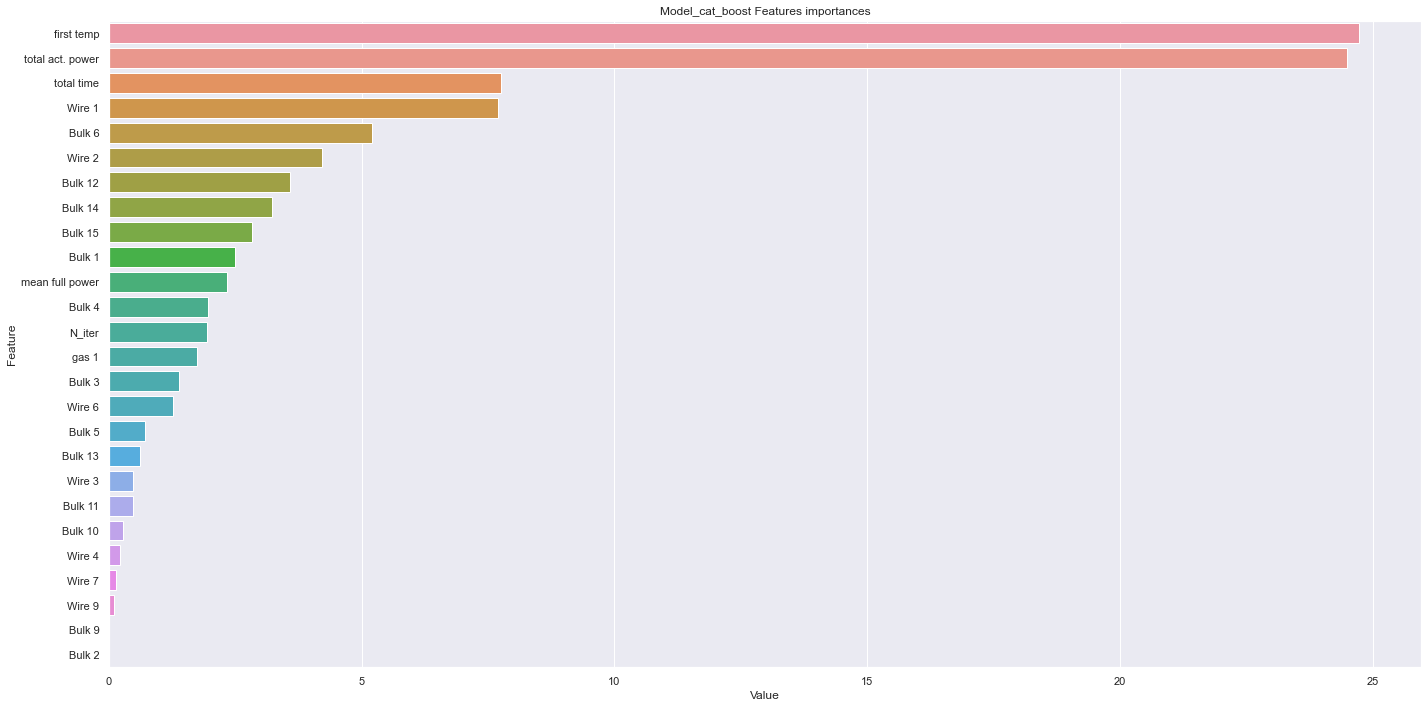

In [70]:
feature_imp = pd.DataFrame(sorted(zip(model_cat_boost.best_estimator_.feature_importances_, features_train)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Model_cat_boost Features importances')
plt.tight_layout()
plt.show()

**On the training sample, Mae 5.6 was obtained. This is a good result, less than 8.7 (limit value from the condition).
The most important features in the model are the first temperature, full power, total time and wire material Wire1**

## 4. Analysis of models

Check the model on a test sample (MAE), measure the speed of their work (time learning and time of prediction)

In [71]:
import time
models = [
    model_lgbm.best_estimator_, 
    model_cat_boost.best_estimator_,
    model]

model_names = ['LGBMRegressor',
              'CatBoostRegressor',
              'LinearRegression']
a = []
for i in range(3):
    if i != 2:
        features_train, features_test = features_train, features_test
    else:
        features_train, features_test = features_train_st, features_test_st
    row = []
    start = time.time()
    models[i].fit(features_train, target_train)
    fit_time = time.time() - start
    prediction = models[i].predict(features_test)
    predict_time = time.time() - start
    score = mae(target_test, prediction)
    row.append(model_names[i])
    row.append(fit_time)
    row.append(predict_time)
    row.append(score)
    a.append(row)

0:	learn: 7.8819345	total: 1.42ms	remaining: 636ms
1:	learn: 7.7224721	total: 2.74ms	remaining: 614ms
2:	learn: 7.6255232	total: 3.89ms	remaining: 579ms
3:	learn: 7.4941879	total: 5.01ms	remaining: 558ms
4:	learn: 7.3370991	total: 6.24ms	remaining: 556ms
5:	learn: 7.2769519	total: 7.45ms	remaining: 551ms
6:	learn: 7.1871935	total: 8.59ms	remaining: 544ms
7:	learn: 7.1169920	total: 9.82ms	remaining: 543ms
8:	learn: 6.9937166	total: 11ms	remaining: 540ms
9:	learn: 6.8855763	total: 12.3ms	remaining: 541ms
10:	learn: 6.8450945	total: 13.5ms	remaining: 538ms
11:	learn: 6.7649469	total: 14.7ms	remaining: 537ms
12:	learn: 6.7231544	total: 15.9ms	remaining: 535ms
13:	learn: 6.6558530	total: 17.1ms	remaining: 533ms
14:	learn: 6.5948188	total: 18.3ms	remaining: 531ms
15:	learn: 6.5553388	total: 19.5ms	remaining: 529ms
16:	learn: 6.5070894	total: 20.7ms	remaining: 528ms
17:	learn: 6.4461160	total: 21.9ms	remaining: 526ms
18:	learn: 6.4058214	total: 23.1ms	remaining: 524ms
19:	learn: 6.3818896	tot

299:	learn: 4.2092183	total: 343ms	remaining: 172ms
300:	learn: 4.2068342	total: 345ms	remaining: 171ms
301:	learn: 4.2064864	total: 346ms	remaining: 169ms
302:	learn: 4.2039341	total: 347ms	remaining: 168ms
303:	learn: 4.2023759	total: 348ms	remaining: 167ms
304:	learn: 4.2018481	total: 349ms	remaining: 166ms
305:	learn: 4.2007145	total: 351ms	remaining: 165ms
306:	learn: 4.2001261	total: 352ms	remaining: 164ms
307:	learn: 4.1987198	total: 353ms	remaining: 163ms
308:	learn: 4.1949564	total: 354ms	remaining: 162ms
309:	learn: 4.1916641	total: 356ms	remaining: 161ms
310:	learn: 4.1906816	total: 357ms	remaining: 159ms
311:	learn: 4.1889604	total: 358ms	remaining: 158ms
312:	learn: 4.1878754	total: 359ms	remaining: 157ms
313:	learn: 4.1861340	total: 360ms	remaining: 156ms
314:	learn: 4.1845221	total: 362ms	remaining: 155ms
315:	learn: 4.1836892	total: 363ms	remaining: 154ms
316:	learn: 4.1817662	total: 364ms	remaining: 153ms
317:	learn: 4.1768644	total: 366ms	remaining: 152ms
318:	learn: 

In [72]:
result = pd.DataFrame(data = a, columns = ['Model name', 'Learning time', 'Prediction time', 'MAE'])
display(result)

,Model name,Learning time,Prediction time,MAE
0,LGBMRegressor,0.210217,0.212231,6.024979
1,CatBoostRegressor,0.592507,0.595499,6.255141
2,LinearRegression,0.000997,0.000997,6.183140


**The best results in our research showed the LGBMregressor model. On the test sample, MAE = 6.024979. The model was also relatively quickly learning and making predictions, yielding only linear regression.**

We check the model for adequacy by comparing the metrics with the metric obtained from a dummy model.

In [73]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
prediction = dummy_regr.predict(features_test)
score = mae(target_test, prediction)
print(score)

8.32016302462712


**All models are adequate**

## Conclusion

We have learned a model predicting the temperature of the steel. In our research, the optimal model that predictive steel temperature is LGBMregressor. On the test sample, MAE = 6.024979.

# Report

In order to optimize production costs, the smelter decided to reduce energy consumption at a processing phase. In this research, a model predicting the temperature was learned.


At the first stage, We have done data analysis from which we take the general information about data learned and identified some features and problems in individual tables. According to information from some tables, new features were generated for the model.

    - The data from 'data_arc' has grouped data on individual parties, and also created a new feature "mean full power", based on info on active and reactive powers. Checked data on correlation and left for a summary table features: "number of operations", "full power", "total act. power"
    - In tables 'data_bulk' and 'data_wire' found anomalous values in some materials. Features with info on additives that were used once or did not use at all, were not used in the model.
    - In the 'data_gas' table was also discovered unusually high values.
    - Information on first and last temperatures, total process time was selected from the 'data_temp' table. In the study we did not use information about the parties in which there were missed values about beginning and end of the process. Also we deleted outliers where temperatures were taken below the melting point.
    
    
According to the results of the analysis, a further research plan was adopted (the second stage of work). Further work was carried out in accordance with it.
    
Features were tested for multicollinarity in the consolidated table, as a result, several factors were excluded.
    
features and target ("temp_out") were allocated, the DataFrame was divided into training and test sample. Features were scaling for linear models.

We used three models in our study : LinearRegression, LGBMRegressor, CatBoostRegressor. All models have shown a good result and passed an adequacy check. For two models - LGBMRegressor, CatBoostRegressor - the importance of features was evaluated.

The final model was chosen **LGBMRegressor**, which showed on the test samples **Best Quality: MAE = 6.024979**.